## Зимин Евгений Евгеньевич

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3


В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k+1} = \dfrac{m_{k+1}}{1 - \beta_1^{k+1}}, \quad \widehat{v}_{k+1} = \dfrac{v_{k+1}}{1 - \beta_2^{k+1}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [69]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [71]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [72]:
descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [73]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [74]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [75]:
data = pd.read_csv('autos.csv')

In [76]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

#### 1. Визуализация распределения целевой переменной

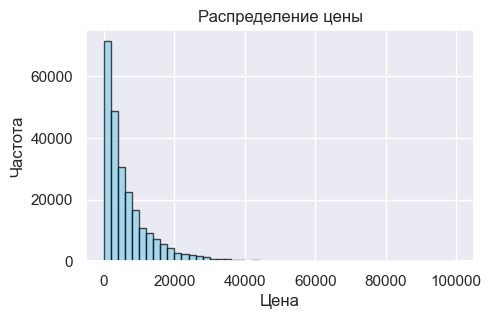

In [77]:
# Построение гистограммы распределения целевой переменной
plt.figure(figsize=(5, 3))
plt.hist(data['price'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Распределение имеет тяжелый правый хвост, что обычно часто происходит с денежными метриками. Прологарифмируем целевую переменную и посмотрим на распределение логарифма цены.

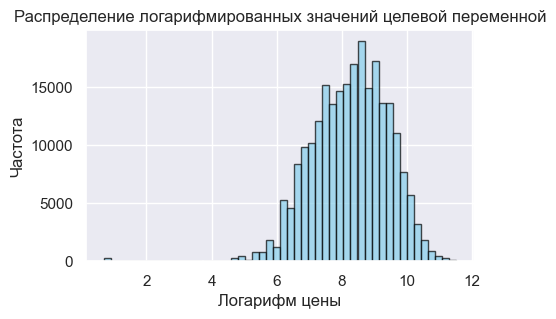

In [78]:
# Применяем логарифмическое преобразование к целевой переменной
data['log_price'] = np.log1p(data['price'])

# Строим гистограмму распределения логарифмированных значений целевой переменной
plt.figure(figsize=(5, 3))
plt.hist(data['log_price'] , bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение логарифмированных значений целевой переменной')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Теперь выглядит на порядок лучше, но тем не менее нужно поработать с выбросами около нуля.

#### 2. Удаление выбросов

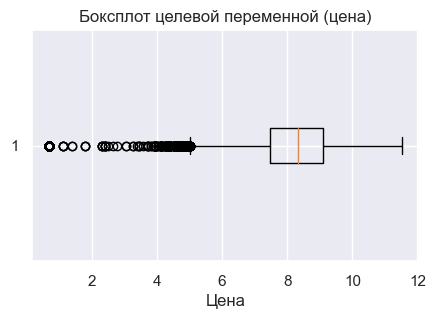

In [79]:
# Строим боксплот для оценки выбросов в целевой переменной
plt.figure(figsize=(5, 3))
plt.boxplot(data['log_price'], vert=False)
plt.title('Боксплот целевой переменной (цена)')
plt.xlabel('Цена')
plt.grid(True)
plt.show()

Как и ожидалось, у нас есть выбросы с левой стороны распределения.

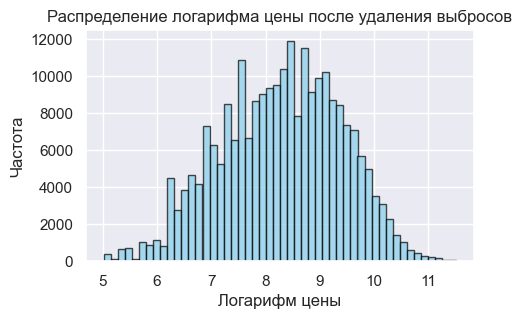

In [80]:
# Вычисляем интерквартильный диапазон
Q1 = data['log_price'].quantile(0.25)
Q3 = data['log_price'].quantile(0.75)
IQR = Q3 - Q1

# Определяем верхнюю и нижнюю границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтруем данные, оставляя только значения внутри границ выбросов
filtered_data = data[(data['log_price'] >= lower_bound) & (data['log_price'] <= upper_bound)]

# Визуализируем распределение после удаления выбросов
plt.figure(figsize=(5, 3))
plt.hist(filtered_data['log_price'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение логарифма цены после удаления выбросов')
plt.xlabel('Логарифм цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


Стало еще лучше. Продолжим работать с этими данными. Как видим ниже, удалили незначительное количество наблюдений.

In [81]:
data.shape, filtered_data.shape

((241190, 11), (240399, 11))

In [82]:
data = filtered_data.copy(deep=True)

#### 3. Исследование данных

In [83]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313887
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188967
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.478510
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696667
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.601402


In [84]:
data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
price                  int64
log_price            float64
dtype: object

In [85]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ (EDA)

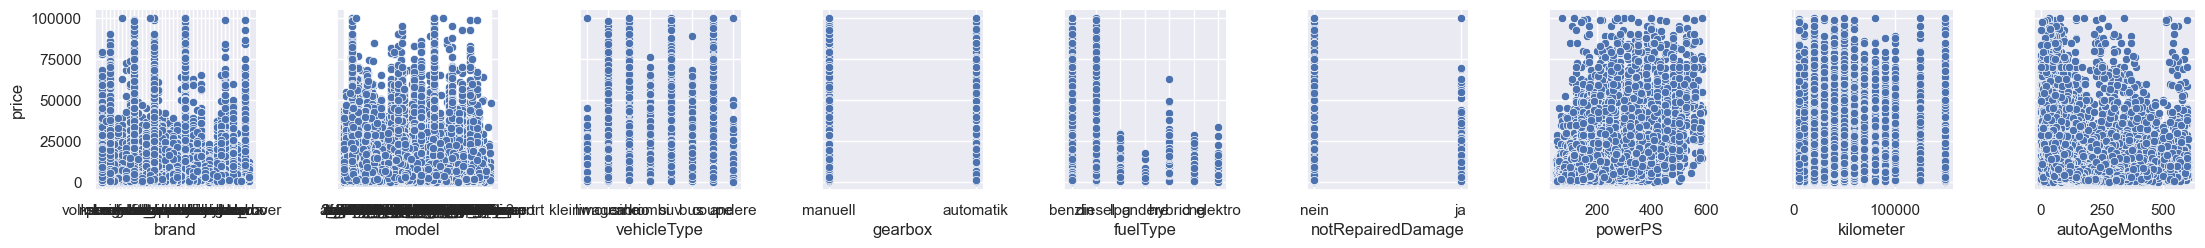

In [86]:
# Графики зависимости целевой переменной от других признаков
sns.pairplot(data, x_vars=data.columns.drop(['price', 'log_price']), y_vars='price', kind='scatter')
plt.show()

В целом, можно увидеть, что powerPS, notRepairedDamage, fuelType могут оказаться полезными признаками, поскольку в зависимости от разных значений целевая переменная различается сильнее. На других графиках явной зависимости не наблюдается, возможно увидим после обучения.

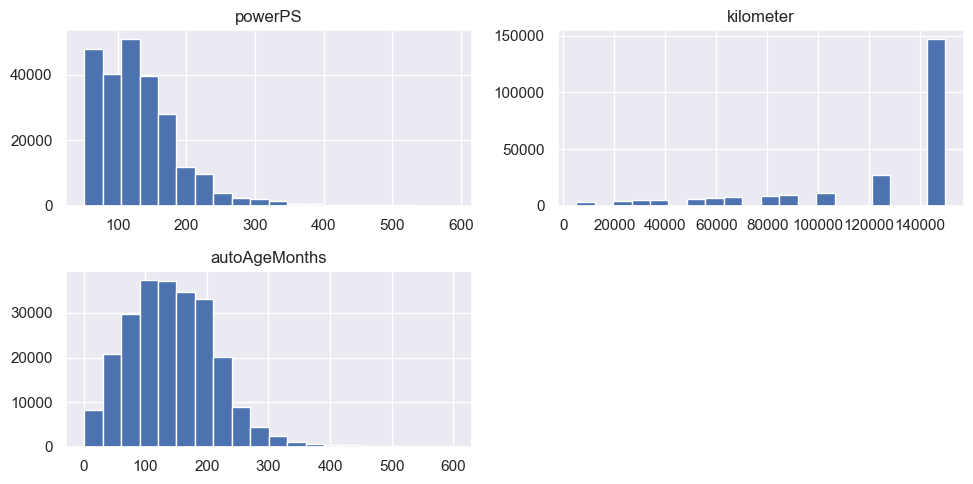

In [87]:
# Гистограммы распределений значений признаков
data[numeric].hist(bins=20, figsize=(10,5))
plt.tight_layout()
plt.show()

Видим, что PowerPS, autoAgeMonths скорее всего имеют экстремальные значения справа, а пробег - слева. Очистим выбросы.

In [88]:
Q1 = data[numeric].quantile(0.25)
Q3 = data[numeric].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = data[~((data[numeric] < lower_bound) | (data[numeric] > upper_bound)).any(axis=1)]

data.shape, filtered_data.shape 


((240399, 11), (223040, 11))

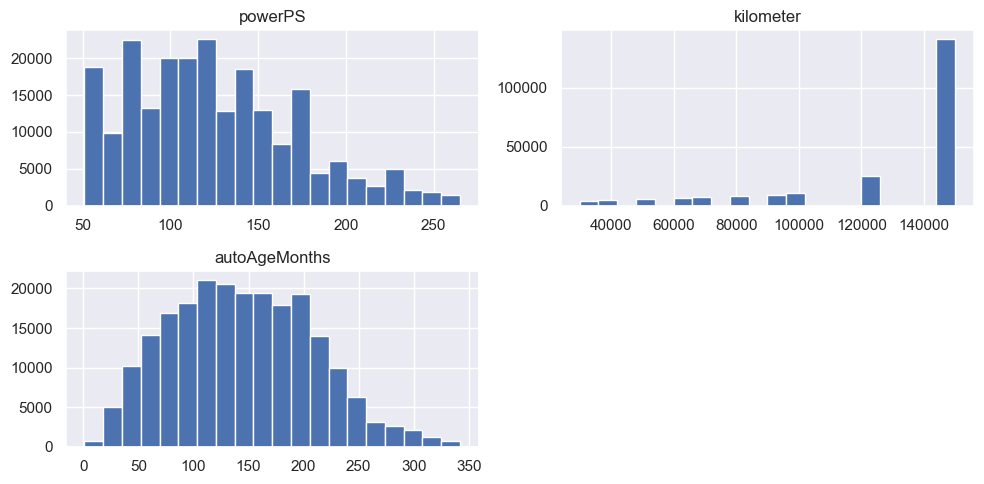

In [89]:
# Гистограммы распределений значений признаков
filtered_data[numeric].hist(bins=20, figsize=(10,5))
plt.tight_layout()
plt.show()

Распределения стали лучше, продолжим работать с отфильтрованным датасетом.

In [90]:
data = filtered_data.copy(deep=True)

4. **Предобработка данных**:

Выше мы определили набор категориальных и числовых колонок. Далее используем:

- **OneHotEncoder для категориальных признаков**: Категориальные признаки необходимо преобразовать в числовой формат перед использованием в линейной регрессии. `OneHotEncoder` преобразует категориальные переменные в бинарные векторы, что позволяет модели корректно интерпретировать эти признаки без внесения искажений, связанных с порядком значений.

- **StandardScaler для численных признаков**: Масштабирование численных признаков с помощью `StandardScaler` помогает стандартизировать данные, приводя их к одному масштабу с нулевым средним и единичным стандартным отклонением. Это улучшает интерпретацию весов линейной модели (а также мы обсудим на лекции, почему это ускоряет обучение модели)


In [91]:
data['bias'] = 1
other = ['bias']

x = data[categorical + numeric + other]
y = data['price']

x.shape

(223040, 10)

Данных довольно много. Поскольку следующие задания предполагают проведение экспериментов с точки зрения поиска наилучшей лямбды и пр. параметров, возьмем рандомный сэмпл для таких заданий, иначе код будет отрабатывать ужасно долго на таком объеме данных (проверял эмпирически).

In [92]:
data_sample = data.sample(frac=0.3, random_state=42)

x = data_sample[categorical + numeric + other]
y = data_sample['price']

In [93]:
x.shape

(66912, 10)

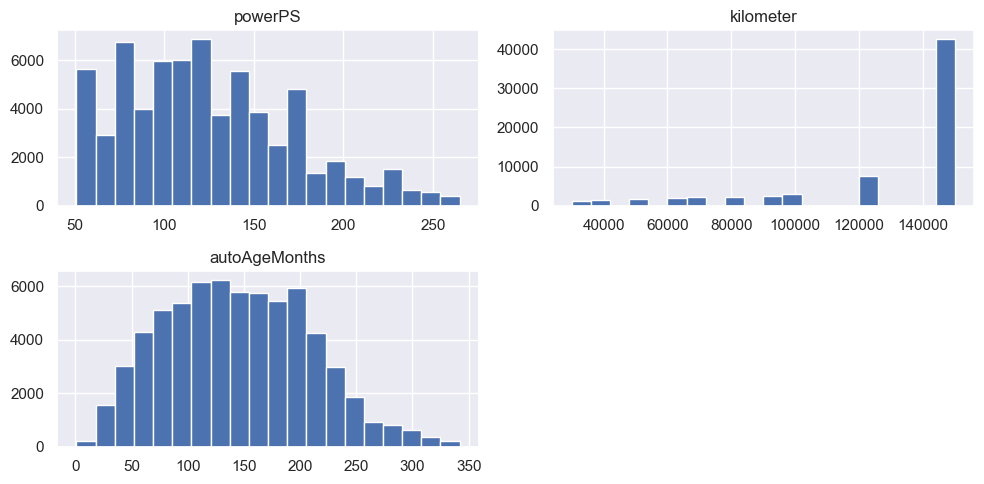

In [94]:
# Гистограммы распределений значений признаков
x[numeric].hist(bins=20, figsize=(10,5))
plt.tight_layout()
plt.show()

Видим, что распределения остались такими же. Поэтому продолжим работать с сэмплом.

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [96]:
x.shape

(66912, 304)

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.

In [97]:
from sklearn.model_selection import train_test_split

# Разделение на обучающую (80%), валидационную (10%) и тестовую (10%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

y_train = y_train.values
y_val = y_val.values
y_test = y_test.values



In [98]:
y_train.shape

(53529,)

## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



Установим максимальное число итераций равное 1000. Это означает, что если на графике число итераций будет равно 1000, то это значит, что алгоритм еще не сошелся в минимум функции ошибки. То есть нужно большее число итераций, чем 1000. 

Напишем общую функцию, которую будем использовать в заданиях ниже.

In [99]:
from sklearn.metrics import r2_score
from tqdm import tqdm
import time 

def analyze_and_plot_descent(descent_config, X_train, y_train, X_val, y_val,
                             lambda_range=np.logspace(-4, 1, num=15),
                             max_iter=1000,
                             tolerance=10**-2,
                             loss_threshold = 10**20):
    # Списки для хранения результатов
    n_iters = []
    loss_history = []
    training_times = []
    train_errors = []
    val_errors = []
    train_r2_scores = []
    val_r2_scores = []  
    for lambda_value in tqdm(lambda_range):
        descent_config['kwargs']['lambda_'] = lambda_value
        model = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter,
            loss_threshold=loss_threshold
        )

        start_time = time.time()

        # Обучение модели на обучающем наборе данных
        model.fit(X_train, y_train)

        training_times.append(time.time() - start_time)
        n_iters.append(len(model.loss_history))
        loss_history.append(model.loss_history)
        # Получение предсказаний на обучающем и валидационном наборах
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        # Вычисление ошибки на обучающем и валидационном наборах
        train_error = model.calc_loss(X_train, y_train)
        val_error = model.calc_loss(X_val, y_val)

        # Вычисление R^2 на обучающем и валидационном наборах
        train_r2 = r2_score(y_train, y_train_pred)
        val_r2 = r2_score(y_val, y_val_pred)

        # Добавление результатов в соответствующие списки
        train_errors.append(train_error)
        val_errors.append(val_error)
        train_r2_scores.append(train_r2)
        val_r2_scores.append(val_r2)

    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    gd_name = descent_config['descent_name']
    fig.suptitle(f'Визуализация параметров обучения для {gd_name} GD')
    # Отображение лоссов на обучающей выборки в зависимости от итерации для каждой лямбды
    for i, lambda_val in enumerate(lambda_range):
        ax[0,0].plot(loss_history[i], label=f'$\lambda=${lambda_val:.5f}')
    ax[0,0].set_ylim(0, 1e8)    
    ax[0,0].set_xlabel('Итерация')
    ax[0,0].set_ylabel('Loss')
    ax[0,0].set_title('Loss для обучающей выборки в зависимости от итерации для различных $\lambda$')
    ax[0,0].legend()
    ax[0,0].grid(True)

    # Отображение времени обучения в зависимости от значения лямбда
    ax[0,1].plot(lambda_range, training_times, marker='o')
    ax[0,1].set_xlabel('$\lambda$')
    ax[0,1].set_ylabel('Время обучения (секунды)')
    ax[0,1].set_title('Время обучения в зависимости от значения $\lambda$')
    ax[0,1].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[0,1].grid(True)

    # Отображение R^2 в зависимости от итерации для каждой лямбды
    max_train_r2_score = train_r2_scores[np.argmax(train_r2_scores)]
    best_lambda = lambda_range[np.argmax(train_r2_scores)]
    ax[1,0].axhline(y=max_train_r2_score, color='r', linestyle='--', label=f'Best $R^2$: {max_train_r2_score:.2f}, $\lambda$: {best_lambda:.5f}')    
    ax[1,0].plot(lambda_range, train_r2_scores, marker='o')
    ax[1,0].legend()
    ax[1,0].set_ylim(-2, 1)    
    ax[1,0].set_xlabel('$\lambda$')
    ax[1,0].set_ylabel('$R^2$')
    ax[1,0].set_title('$R^2$ для обучающей выборки в зависимости от значения $\lambda$')
    ax[1,0].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[1,0].grid(True)

    # Отображение R^2 в зависимости от итерации для каждой лямбды
    max_val_r2_score = val_r2_scores[np.argmax(val_r2_scores)]
    best_lambda = lambda_range[np.argmax(val_r2_scores)]
    ax[1,1].axhline(y=max_val_r2_score, color='r', linestyle='--', label=f'Best $R^2$: {max_val_r2_score:.2f}, $\lambda$: {best_lambda:.5f}')
    ax[1,1].plot(lambda_range, val_r2_scores, marker='o')
    ax[1,1].legend()
    ax[1,1].set_ylim(-2, 1)    
    ax[1,1].set_xlabel('$\lambda$')
    ax[1,1].set_ylabel('$R^2$')
    ax[1,1].set_title('$R^2$ для валидационной выборки в зависимости от значения $\lambda$')
    ax[1,1].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[1,1].grid(True)

    # Отображение loss train в зависимости от значения лямбда
    ax[2,0].plot(lambda_range, train_errors, marker='o')
    ax[2,0].set_xlabel('$\lambda$')
    ax[2,0].set_ylabel('Loss')
    ax[2,0].set_title('Loss для обучающей выборки в зависимости от значения $\lambda$')
    ax[2,0].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[2,0].grid(True)

    # Отображение val train в зависимости от значения лямбда
    ax[2,1].plot(lambda_range, val_errors, marker='o')  
    ax[2,1].set_xlabel('$\lambda$')
    ax[2,1].set_ylabel('Loss')
    ax[2,1].set_title('Loss для валидационной выборки в зависимости от значения $\lambda$')
    ax[2,1].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[2,1].grid(True)

    # Устанавливаем промежутки между графиками
    plt.tight_layout()
    plt.show()    

100%|███████████████████████████████████████████| 15/15 [01:59<00:00,  7.94s/it]

Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.


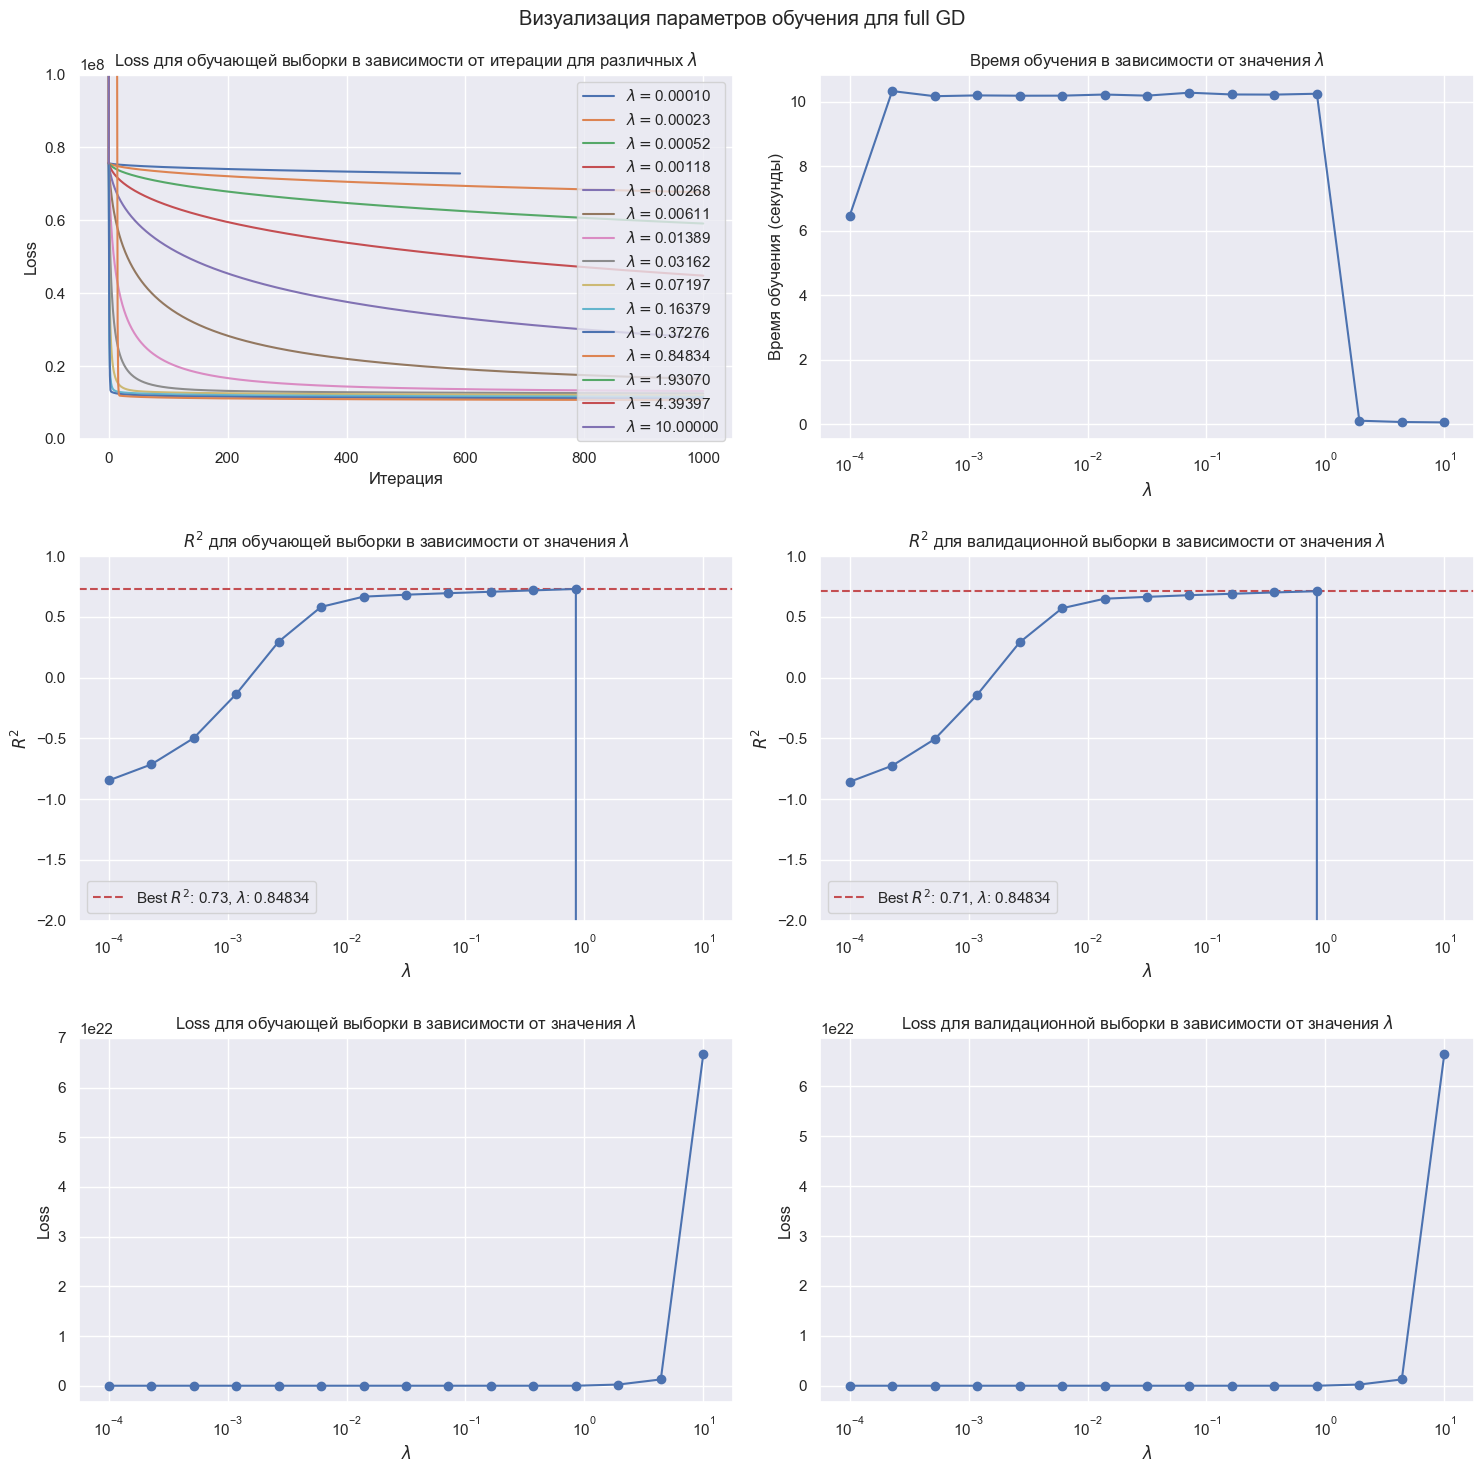

In [32]:
descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}
analyze_and_plot_descent(descent_config, X_train, y_train, X_val, y_val,)

Для полного градиентного спуска лучшая $\lambda = 0.84834$. При $\lambda > 1$ у нас резко возрастает ошибка и снижается время обучения, поскольку происходит взрыв градиента, и цикл прерывается. При этом время обучения на отрезке держится константой,  и максимальный $R^2$ как раз достигается при $\lambda = 0.84834$. При этом при таком уровне лямбда лосс снижается очень быстро.

100%|███████████████████████████████████████████| 15/15 [00:07<00:00,  1.94it/s]


Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.


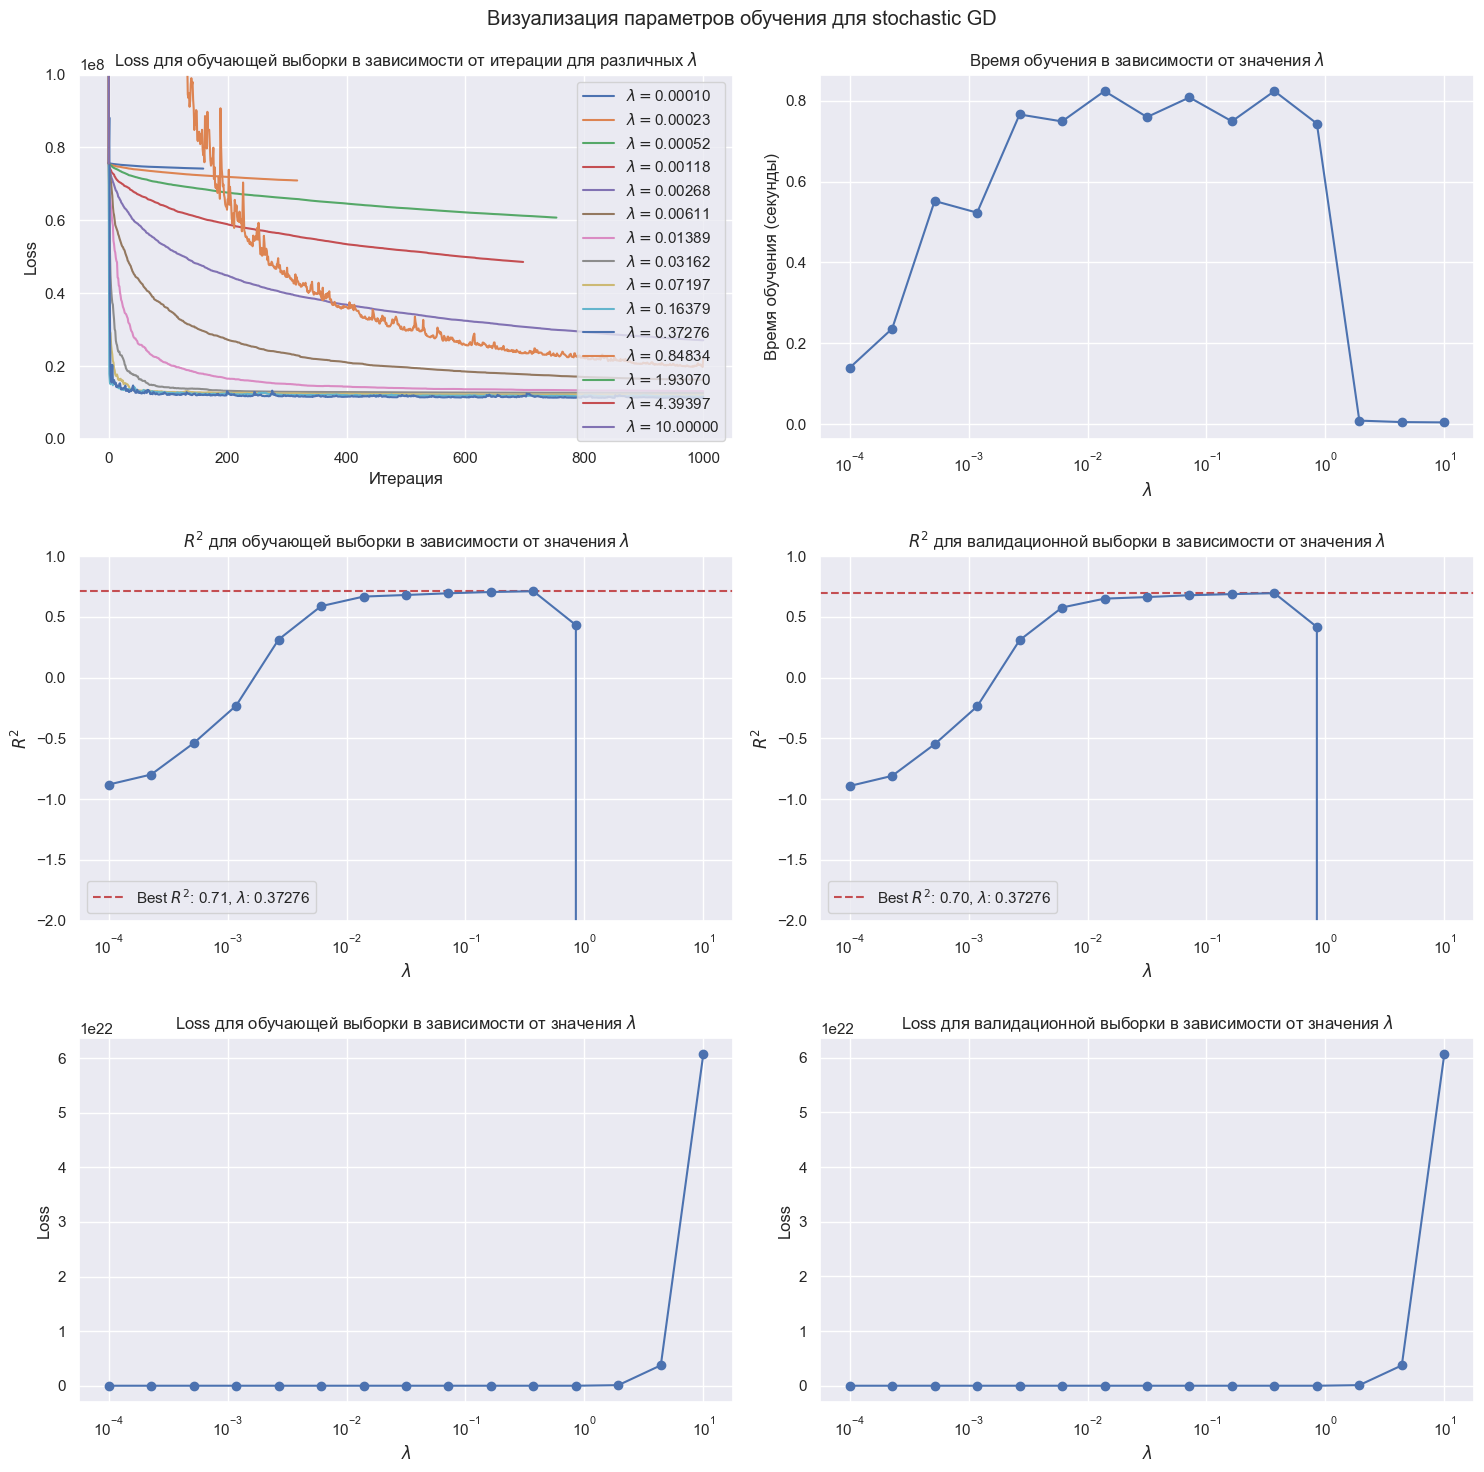

In [100]:
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': X_train.shape[1],
        'batch_size': 10
    }
}
analyze_and_plot_descent(descent_config, X_train, y_train, X_val, y_val,)

Для стохастического градиентного спуска лучшая $\lambda = 0.37276$. При $\lambda > 1$ у нас резко возрастает ошибка и снижается время обучения, поскольку происходит взрыв градиента, и цикл прерывается. При этом время обучения на отрезке держится константой,  и максимальный $R^2$ как раз достигается при $\lambda = 0.37276$. При этом при таком уровне лямбда лосс снижается очень быстро. Время обучения в разы меньше, чем при полном градиентном спуске, поскольку учитываются в одной итерации только небольшая часть выборки. При этом $R^2$ получается немного ниже, чем при полном спуске, что тоже логично, ибо сходимость неидеальная, но зато по времени очень быстро!

100%|███████████████████████████████████████████| 15/15 [02:20<00:00,  9.35s/it]


Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.


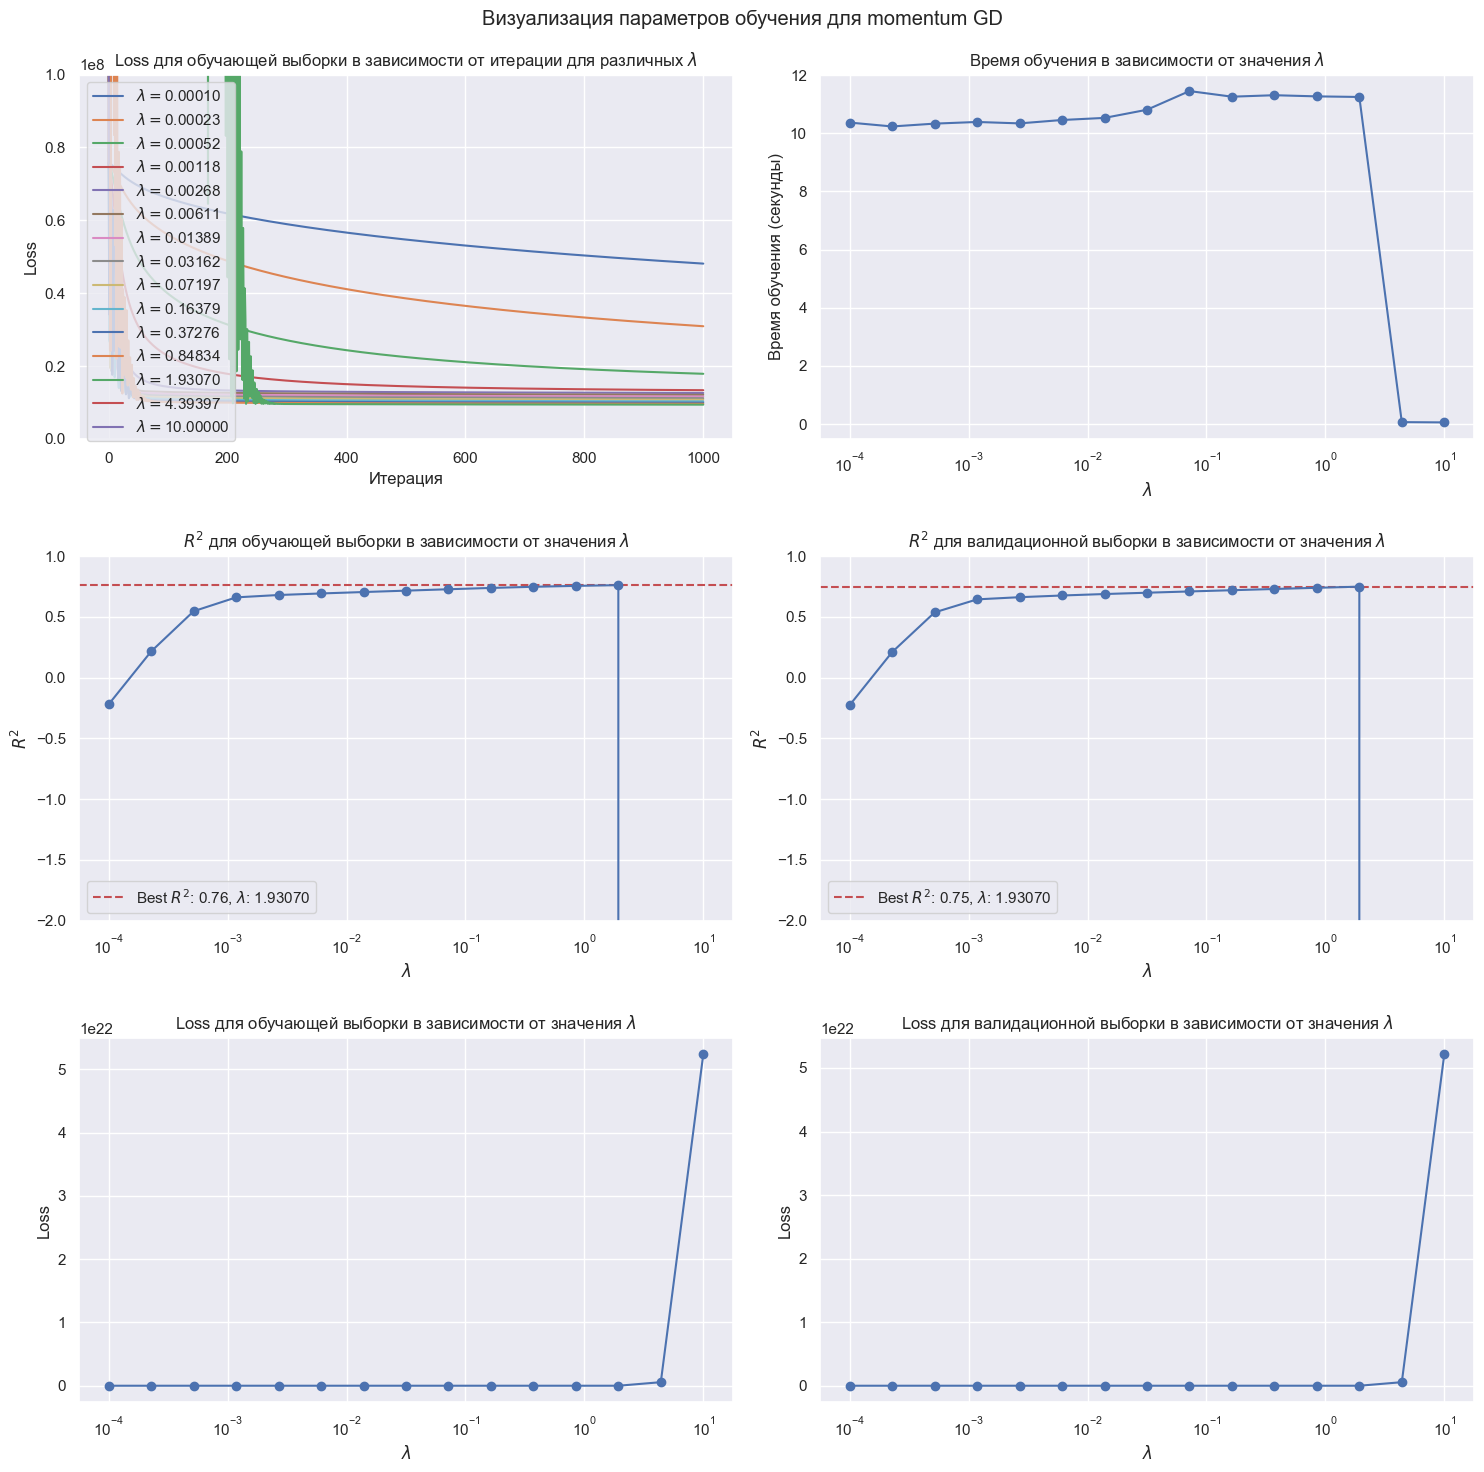

In [34]:
descent_config = {
    'descent_name': 'momentum',
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}
analyze_and_plot_descent(descent_config, X_train, y_train, X_val, y_val,)

Для инерционного градиентного спуска лучшая $\lambda = 1.93070$. При больших $\lambda$ у нас резко возрастает ошибка и снижается время обучения, поскольку происходит взрыв градиента, и цикл прерывается. При этом время обучения на отрезке держится константой,  и максимальный $R^2$ как раз достигается при $\lambda = 1.93070$. При этом при таком уровне лямбда лосс снижается очень быстро. Время обучения примерно совпадает, чем при полном градиентном спуске. Но качество модели получилось лучше, чем при полном! То есть более умный градиентный спуск быстрее смог сойтись к весам, которые обеспечили большее качество модели, чем при полном, за то же самое время!

100%|███████████████████████████████████████████| 15/15 [01:07<00:00,  4.51s/it]


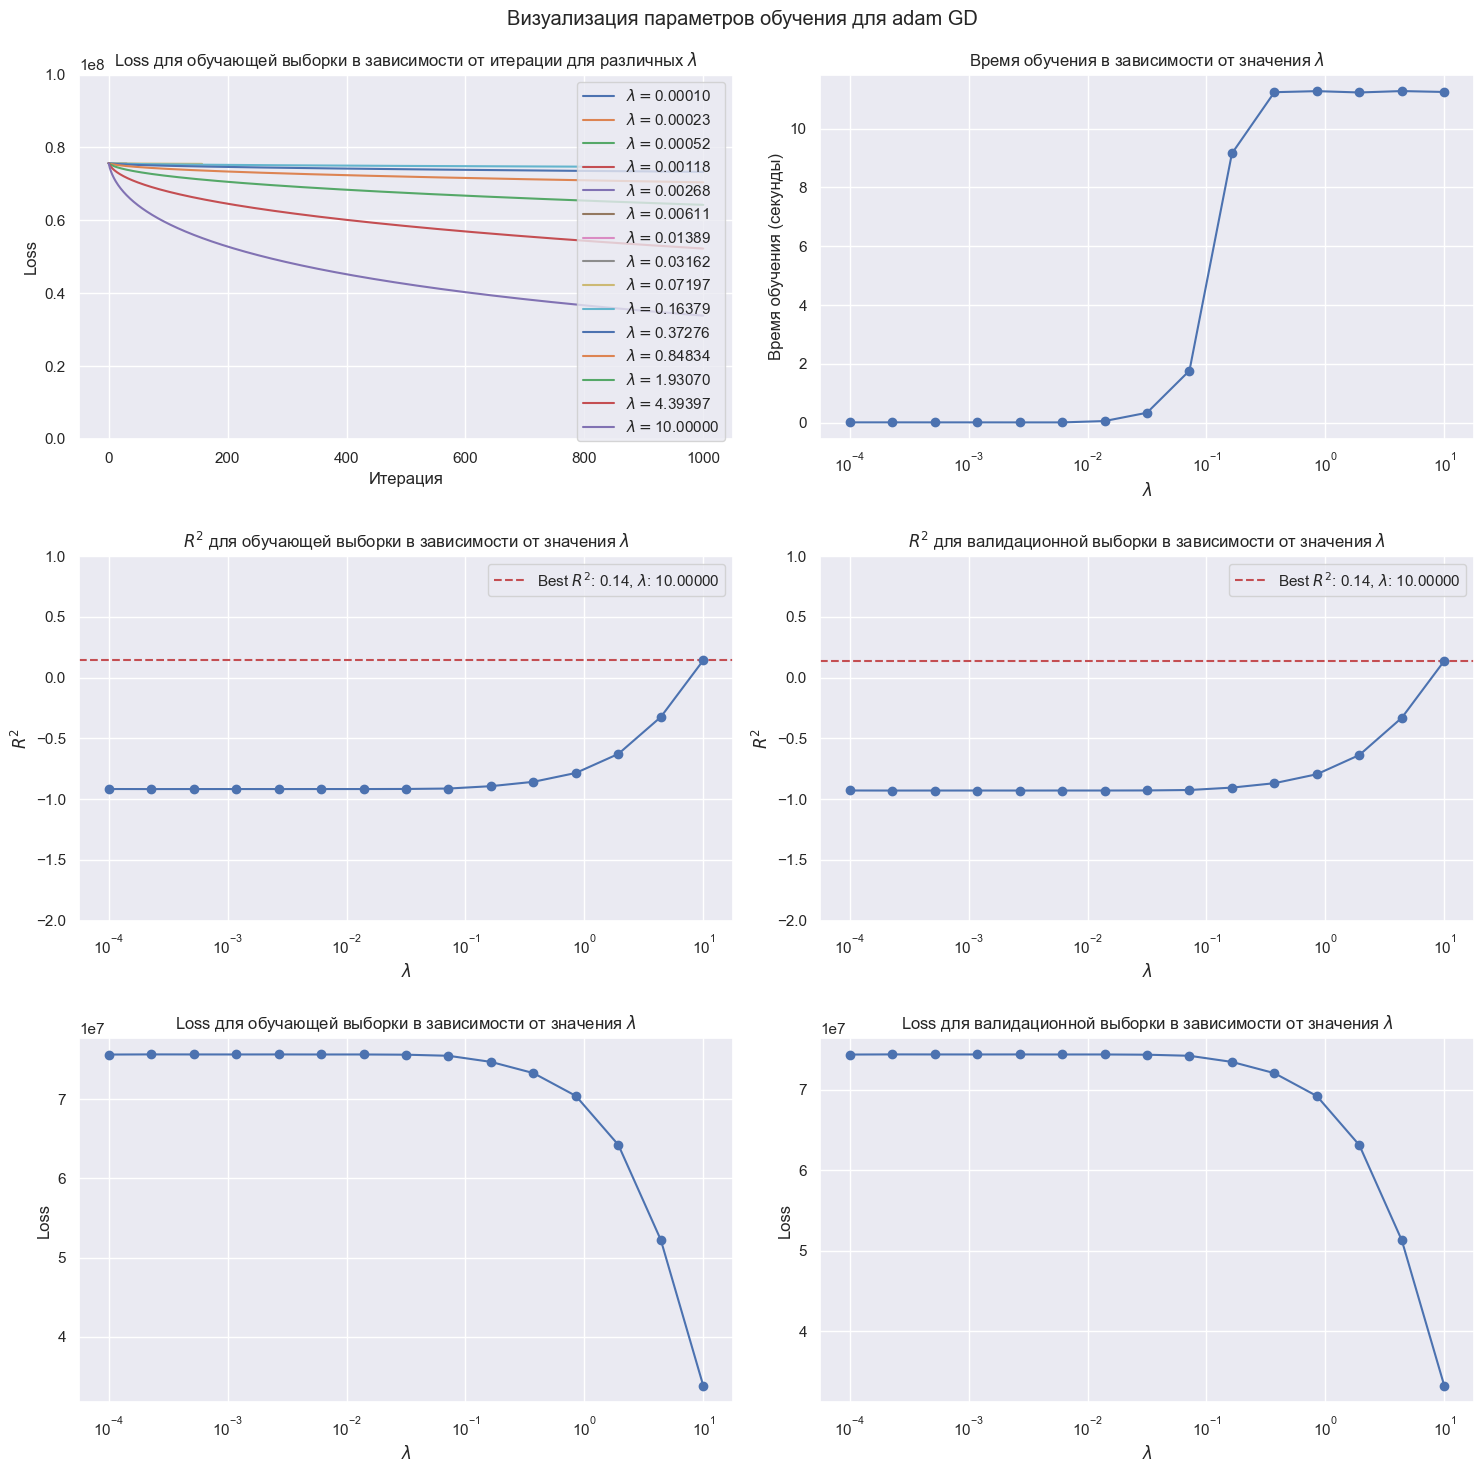

In [35]:
descent_config = {
    'descent_name': 'adam',
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}
analyze_and_plot_descent(descent_config, X_train, y_train, X_val, y_val,)

Для адам-градиентного спуска лучшая $\lambda = 10$. Ошибки получились довольно большими, качество очень маленькое. Видимо, необходимо перебрать другие зафиксированные параметры, для этого датасета они явно не подходят.

В целом, отметим, что изменение лямбды в ряде случаев сводит качество на нет, таким образом, это важный гиперпараметр, от него зависит в целом, как быстро сойдется ошибка к минимуму и сойдется ли вообще (не будет ли взрыва градиента).

В эксперименте выше momentum градиентный спуск показал себя лучше всех.

### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

In [36]:
descent_configs = {
    'full': {
        'descent_name': 'full',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 0.84834
        }
    },
    'stochastic': {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': X_train.shape[1],
            'batch_size': 10,
            'lambda_': 0.37276
        }
    },
    'momentum': {
        'descent_name': 'momentum',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 1.93070
        }
    },
    'adam': {
        'descent_name': 'adam',
        'kwargs': {
            'dimension': X_train.shape[1],
            'lambda_': 10.0
        }
    }
}    

In [37]:
max_iter=1000
tolerance=10**-2
loss_threshold = 10**20

n_iters = []
loss_history = []
training_times = []
train_errors = []
val_errors = []
train_r2_scores = []
val_r2_scores = []  

for descent_method in tqdm(descent_configs.keys()):
    descent_config = descent_configs[descent_method]
    model = LinearRegression(
        descent_config=descent_config,
        tolerance=tolerance,
        max_iter=max_iter,
        loss_threshold=loss_threshold
    )
    start_time = time.time()

    # Обучение модели на обучающем наборе данных
    model.fit(X_train, y_train)

    training_times.append(time.time() - start_time)
    n_iters.append(len(model.loss_history))
    loss_history.append(model.loss_history)
    # Получение предсказаний на обучающем и валидационном наборах
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Вычисление ошибки на обучающем и валидационном наборах
    train_error = model.calc_loss(X_train, y_train)
    val_error = model.calc_loss(X_val, y_val)

    # Вычисление R^2 на обучающем и валидационном наборах
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Добавление результатов в соответствующие списки
    train_errors.append(train_error)
    val_errors.append(val_error)
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)


100%|█████████████████████████████████████████████| 4/4 [00:34<00:00,  8.64s/it]


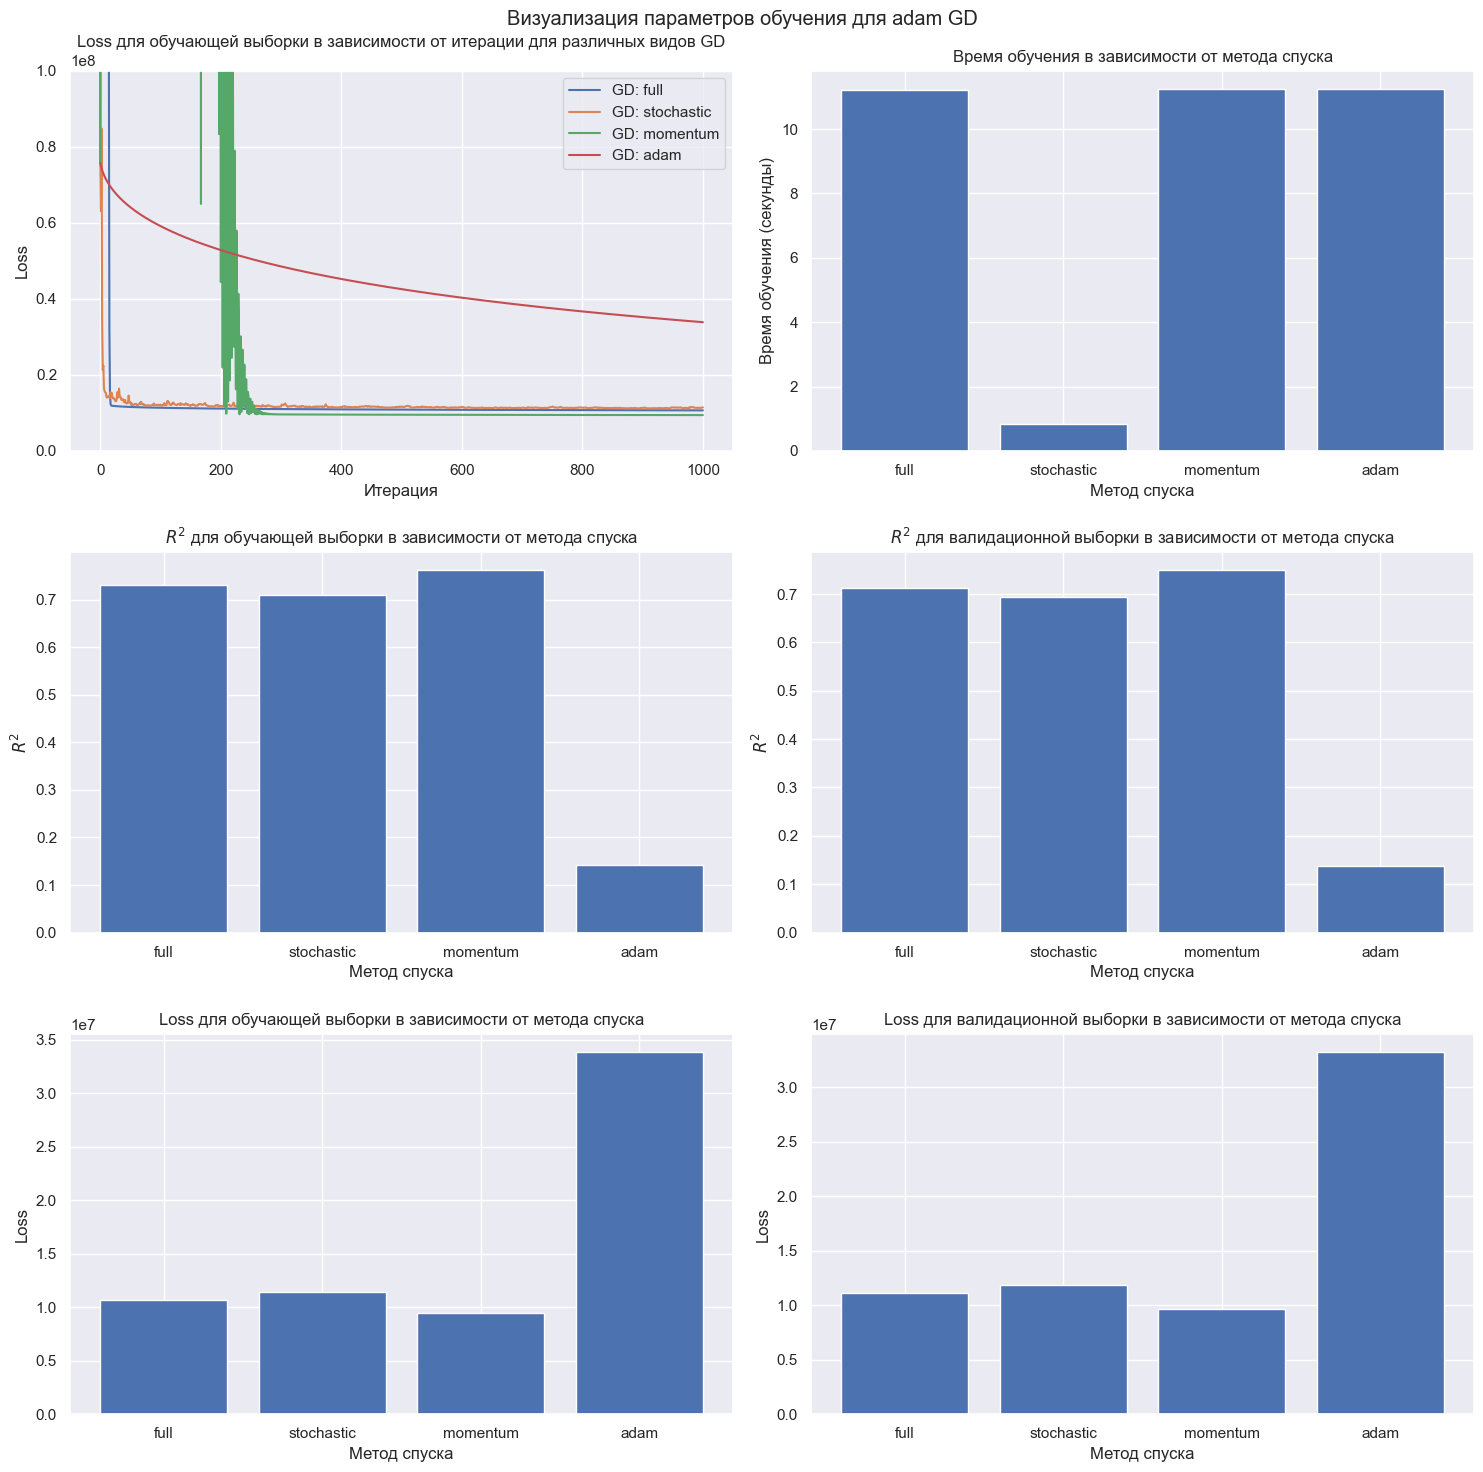

In [38]:

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
gd_name = descent_config['descent_name']
fig.suptitle(f'Визуализация параметров обучения для {gd_name} GD')
# Отображение лоссов на обучающей выборки в зависимости от итерации для каждой лямбды
for i, descent_method in enumerate(descent_configs.keys()):
    ax[0,0].plot(loss_history[i], label=f'GD: {descent_method}')
ax[0,0].set_ylim(0, 1e8)    
ax[0,0].set_xlabel('Итерация')
ax[0,0].set_ylabel('Loss')
ax[0,0].set_title('Loss для обучающей выборки в зависимости от итерации для различных видов GD')
ax[0,0].legend()
ax[0,0].grid(True)

# Отображение времени обучения в зависимости от значения лямбда
ax[0,1].bar(descent_configs.keys(), training_times)
ax[0,1].set_xlabel('Метод спуска')
ax[0,1].set_ylabel('Время обучения (секунды)')
ax[0,1].set_title('Время обучения в зависимости от метода спуска')
ax[0,1].grid(True)

# Отображение R^2 обучения
ax[1,0].bar(descent_configs.keys(), train_r2_scores)
ax[1,0].set_xlabel('Метод спуска')
ax[1,0].set_ylabel('$R^2$')
ax[1,0].set_title('$R^2$ для обучающей выборки в зависимости от метода спуска')
ax[1,0].grid(True)

# Отображение R^2 валидации
ax[1,1].bar(descent_configs.keys(), val_r2_scores)
ax[1,1].set_xlabel('Метод спуска')
ax[1,1].set_ylabel('$R^2$')
ax[1,1].set_title('$R^2$ для валидационной выборки в зависимости от метода спуска')
ax[1,1].grid(True)

# Отображение loss train в зависимости от значения лямбда
ax[2,0].bar(descent_configs.keys(), train_errors)
ax[2,0].set_xlabel('Метод спуска')
ax[2,0].set_ylabel('Loss')
ax[2,0].set_title('Loss для обучающей выборки в зависимости от метода спуска')
ax[2,0].grid(True)

# Отображение val train в зависимости от значения лямбда
ax[2,1].bar(descent_configs.keys(), val_errors)
ax[2,1].set_xlabel('Метод спуска')
ax[2,1].set_ylabel('Loss')
ax[2,1].set_title('Loss для валидационной выборки в зависимости от метода спуска')
ax[2,1].grid(True)

# Устанавливаем промежутки между графиками
plt.tight_layout()
plt.show()    

**Выводы**:

- С точки зрения скорости сходимости лучше всего показывает стохастический градиентный спуск, даже на батчах небольшого размера (10) ошибка довольно быстро попадает в зону плато, в отличие от других методов.

- С точки зрения времени обучения стохастический градиентный спуск, как ему и положено, в разы превосходит остальные методы, поскольку градиент считается на небольшой части выборки.

- Тем не менее, лучшим с точки зрения качества ($R^2$) оказывается инерционный градиентный спуск. Хотя в целом значения качества и полного, и стохастического, и инерционного градиентных спусков оказались одного порядка.

- Адам-градиентный спуск конкретно на этом датасете показал себя хуже всего, но это скорее всего неудачный выбор гиперпараметров. В задании 8 наоборот адам показывает себя лучше всего.

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [39]:
from sklearn.metrics import r2_score
from tqdm import tqdm
import time

max_iter = 5000
tolerance = 10**-2
loss_threshold = 10**20    # в случае взрыва градиента прекратим итерации

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': X_train.shape[1],
        'batch_size': None,
        'lambda_': 0.37276   # взяли лучшую лямбду, которую определили в предыдущем задании
    }
}

# Размеры батчей для исследования
batch_sizes = np.arange(5, 500, 10)

# Количество независимых запусков SGD
k = 10

# Списки для хранения средних значений времени и итераций для каждого размера батча
mean_training_times = []
mean_iterations_to_convergence = []


# Обучение модели для каждого значения lambda
for batch_size in tqdm(batch_sizes):
    training_times = []
    iterations_to_convergence = []
    for _ in range(k):
        descent_config['kwargs']['batch_size'] = batch_size
        
        model = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter,
            loss_threshold=loss_threshold
        )

        start_time = time.time()
        
        model.fit(X_train, y_train)
        
        training_times.append(time.time() - start_time)
        iterations_to_convergence.append(len(model.loss_history))

    # Рассчитываем средние значения времени обучения и количества итераций и добавляем в списки
    mean_training_times.append(np.mean(training_times))
    mean_iterations_to_convergence.append(np.mean(iterations_to_convergence))

100%|███████████████████████████████████████████| 50/50 [38:10<00:00, 45.81s/it]


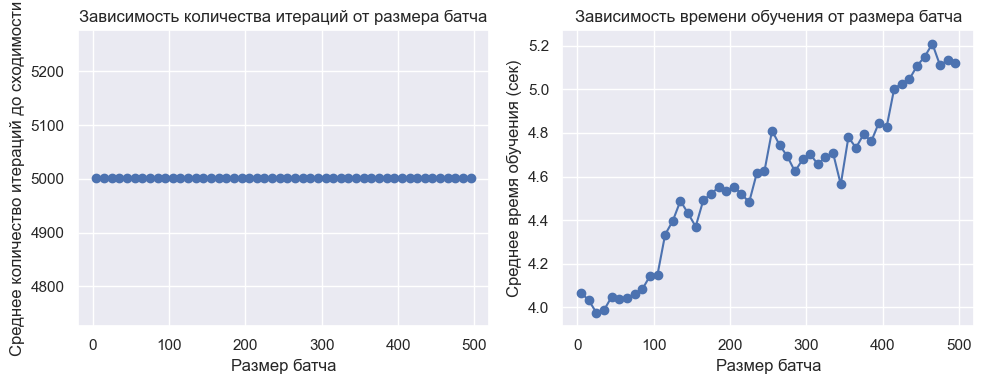

In [40]:
# Построение графиков
plt.figure(figsize=(10, 4))

# График зависимости среднего количества итераций от размера батча
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, mean_iterations_to_convergence, marker='o')
plt.xlabel('Размер батча')
plt.ylabel('Среднее количество итераций до сходимости')
plt.title('Зависимость количества итераций от размера батча')

# График зависимости среднего времени обучения от размера батча
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, mean_training_times, marker='o')
plt.xlabel('Размер батча')
plt.ylabel('Среднее время обучения (сек)')
plt.title('Зависимость времени обучения от размера батча')
plt.tight_layout()
plt.show()

**Вывод**: четко видим, что при увеличении размера батча увеличивается время обучения в секундах до достижения сходимости. Это следствие того, что приходится совершить больше арифметических операций, с более объемными матрицами для нахождения градиента и обновления весов. В то же время, для маленьких батчей среднее время обучения гораздо ниже.

В свою очередь, больший размер батча позволяет совершить меньше итераций для сходимости, чем меньший размер. Это обусловлено тем, что при большем размере батча уменьшается дисперсия градиентов, что ускоряет сходимость. 

Таким образом, при выборе оптимального размера батча необходимо учитывать компромисс между скоростью сходимости модели и временем обучения.

В нашем случае сходимости даже после 5000 итераций достигнуто не было.

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


В задании для визуализации поступим следующим образом. Сначала мы переберем $\lambda$, $\mu$, найдем наилучшие параметры, зафиксируем лучший $\lambda$, и отобразим график, варьируя $\mu$.

In [41]:
from sklearn.metrics import r2_score
from tqdm import tqdm
import time 

def analyze_and_plot_descent_reg(descent_config, X_train, y_train, X_val, y_val,
                             lambda_range=np.logspace(-4, 1, num=5),
                             mu_range=np.logspace(-5, 3, num=10),
                             max_iter=1000,
                             tolerance=10**-2,
                             loss_threshold = 10**20):
    # Списки для хранения результатов
 
    results = {}
    
    best_lambda = None
    best_mu = None
    best_score = -np.inf
    
    for lambda_value in tqdm(lambda_range):
        for mu in mu_range:
            descent_config['kwargs']['lambda_'] = lambda_value
            descent_config['kwargs']['mu'] = mu
            model = LinearRegression(
                descent_config=descent_config,
                tolerance=tolerance,
                max_iter=max_iter,
                loss_threshold=loss_threshold
            )

            start_time = time.time()

            # Обучение модели на обучающем наборе данных
            model.fit(X_train, y_train)

            training_time = time.time() - start_time

            # Получение предсказаний на обучающем и валидационном наборах
            y_train_pred = model.predict(X_train)
            y_val_pred = model.predict(X_val)

            # Вычисление ошибки на обучающем и валидационном наборах
            train_error = model.calc_loss(X_train, y_train)
            val_error = model.calc_loss(X_val, y_val)

            # Вычисление R^2 на обучающем и валидационном наборах
            train_r2 = r2_score(y_train, y_train_pred)
            val_r2 = r2_score(y_val, y_val_pred)
            if val_r2 > best_score:
                best_score = val_r2
                best_lambda = lambda_value
                best_mu = mu
            
            # Добавление результатов в соответствующие списки
            results[(lambda_value, mu)] = {
                'train_r2': train_r2,
                'val_r2': val_r2,
                'train_error': train_error,
                'val_error': val_error,
                'loss_history': model.loss_history,
                'n_iters': len(model.loss_history),
                'training_time': training_time
            }

            
    n_iters = []
    loss_history = []
    training_times = []
    train_errors = []
    val_errors = []
    train_r2_scores = []
    val_r2_scores = []             
    for (lambda_value, mu) in results.keys():
        if lambda_value == best_lambda:
            train_errors.append(results[(lambda_value, mu)]['train_error'])
            val_errors.append(results[(lambda_value, mu)]['val_error'])
            train_r2_scores.append(results[(lambda_value, mu)]['train_r2'])
            val_r2_scores.append(results[(lambda_value, mu)]['val_r2'])
            loss_history.append(results[(lambda_value, mu)]['loss_history'])
            training_times.append(results[(lambda_value, mu)]['training_time'])
             
            
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    gd_name = descent_config['descent_name']
    fig.suptitle(f'Визуализация параметров обучения для {gd_name} GD')
    # Отображение лоссов на обучающей выборки в зависимости от итерации для каждой mu
    for i, mu in enumerate(mu_range):
        ax[0,0].plot(loss_history[i], label=f'$\mu=${mu:.5f}')
    ax[0,0].set_ylim(0, 1e8)    
    ax[0,0].set_xlabel('Итерация')
    ax[0,0].set_ylabel('Loss')
    ax[0,0].set_title('Loss для обучающей выборки в зависимости от итерации для различных $\mu$')
    ax[0,0].legend()
    ax[0,0].grid(True)

    # Отображение времени обучения в зависимости от значения mu
    ax[0,1].plot(mu_range, training_times, marker='o')
    ax[0,1].set_xlabel('$\mu$')
    ax[0,1].set_ylabel('Время обучения (секунды)')
    ax[0,1].set_title('Время обучения в зависимости от значения $\mu$')
    ax[0,1].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[0,1].grid(True)

    # Отображение R^2 в зависимости от итерации для каждой лямбды
    max_train_r2_score = train_r2_scores[np.argmax(train_r2_scores)]
    best_mu = mu_range[np.argmax(train_r2_scores)]
    ax[1,0].axhline(y=max_train_r2_score, color='r', linestyle='--', label=f'Best $R^2$: {max_train_r2_score:.2f}, $\mu$: {best_mu:.5f}')    
    ax[1,0].plot(mu_range, train_r2_scores, marker='o')
    ax[1,0].legend()
    ax[1,0].set_ylim(-2, 1)    
    ax[1,0].set_xlabel('$\mu$')
    ax[1,0].set_ylabel('$R^2$')
    ax[1,0].set_title('$R^2$ для обучающей выборки в зависимости от значения $\mu$')
    ax[1,0].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[1,0].grid(True)

    # Отображение R^2 в зависимости от итерации для каждой лямбды
    max_val_r2_score = val_r2_scores[np.argmax(val_r2_scores)]
    best_mu = mu_range[np.argmax(val_r2_scores)]
    ax[1,1].axhline(y=max_val_r2_score, color='r', linestyle='--', label=f'Best $R^2$: {max_val_r2_score:.2f}, $\mu$: {best_mu:.5f}')
    ax[1,1].plot(mu_range, val_r2_scores, marker='o')
    ax[1,1].legend()
    ax[1,1].set_ylim(-2, 1)    
    ax[1,1].set_xlabel('$\mu$')
    ax[1,1].set_ylabel('$R^2$')
    ax[1,1].set_title('$R^2$ для валидационной выборки в зависимости от значения $\mu$')
    ax[1,1].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[1,1].grid(True)

    # Отображение loss train в зависимости от значения лямбда
    ax[2,0].plot(mu_range, train_errors, marker='o')
    ax[2,0].set_xlabel('$\mu$')
    ax[2,0].set_ylabel('Loss')
    ax[2,0].set_title('Loss для обучающей выборки в зависимости от значения $\mu$')
    ax[2,0].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[2,0].grid(True)

    # Отображение val train в зависимости от значения лямбда
    ax[2,1].plot(mu_range, val_errors, marker='o')  
    ax[2,1].set_xlabel('$\mu$')
    ax[2,1].set_ylabel('Loss')
    ax[2,1].set_title('Loss для валидационной выборки в зависимости от значения $\mu$')
    ax[2,1].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[2,1].grid(True)

    # Устанавливаем промежутки между графиками
    plt.tight_layout()
    plt.show()    

 60%|███████████████████████████                  | 3/5 [03:42<02:31, 75.72s/it]

Gradient explosion detected. Stopping iterations.


 80%|████████████████████████████████████         | 4/5 [04:42<01:09, 69.46s/it]

Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.


100%|█████████████████████████████████████████████| 5/5 [04:42<00:00, 56.51s/it]

Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.


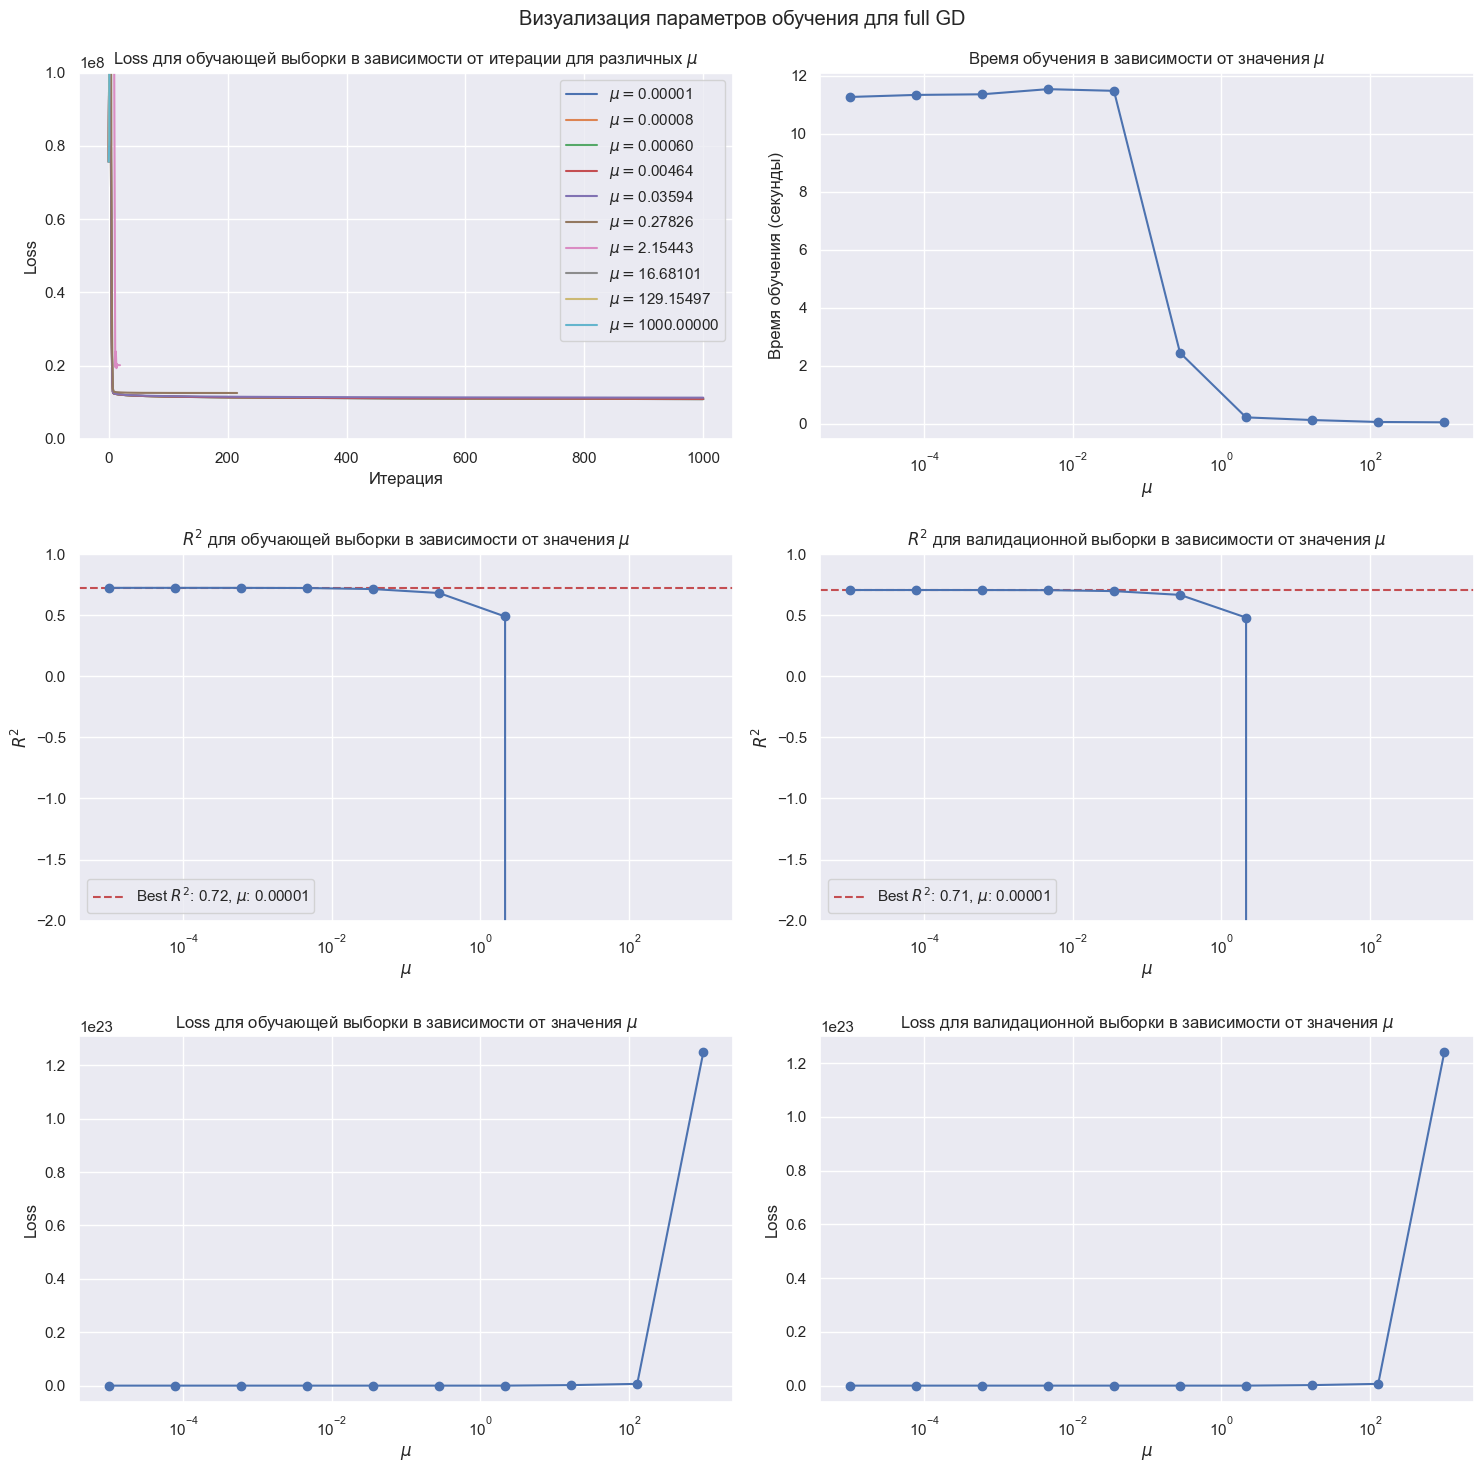

In [42]:
from descents import LossFunction

descent_config = {
    'descent_name': 'full',
    'regularized': True,
    'kwargs': {
        'dimension': X_train.shape[1],
    }
}
analyze_and_plot_descent_reg(descent_config, X_train, y_train, X_val, y_val,)

 60%|███████████████████████████                  | 3/5 [00:15<00:11,  5.82s/it]

Gradient explosion detected. Stopping iterations.


100%|█████████████████████████████████████████████| 5/5 [00:21<00:00,  4.30s/it]

Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.


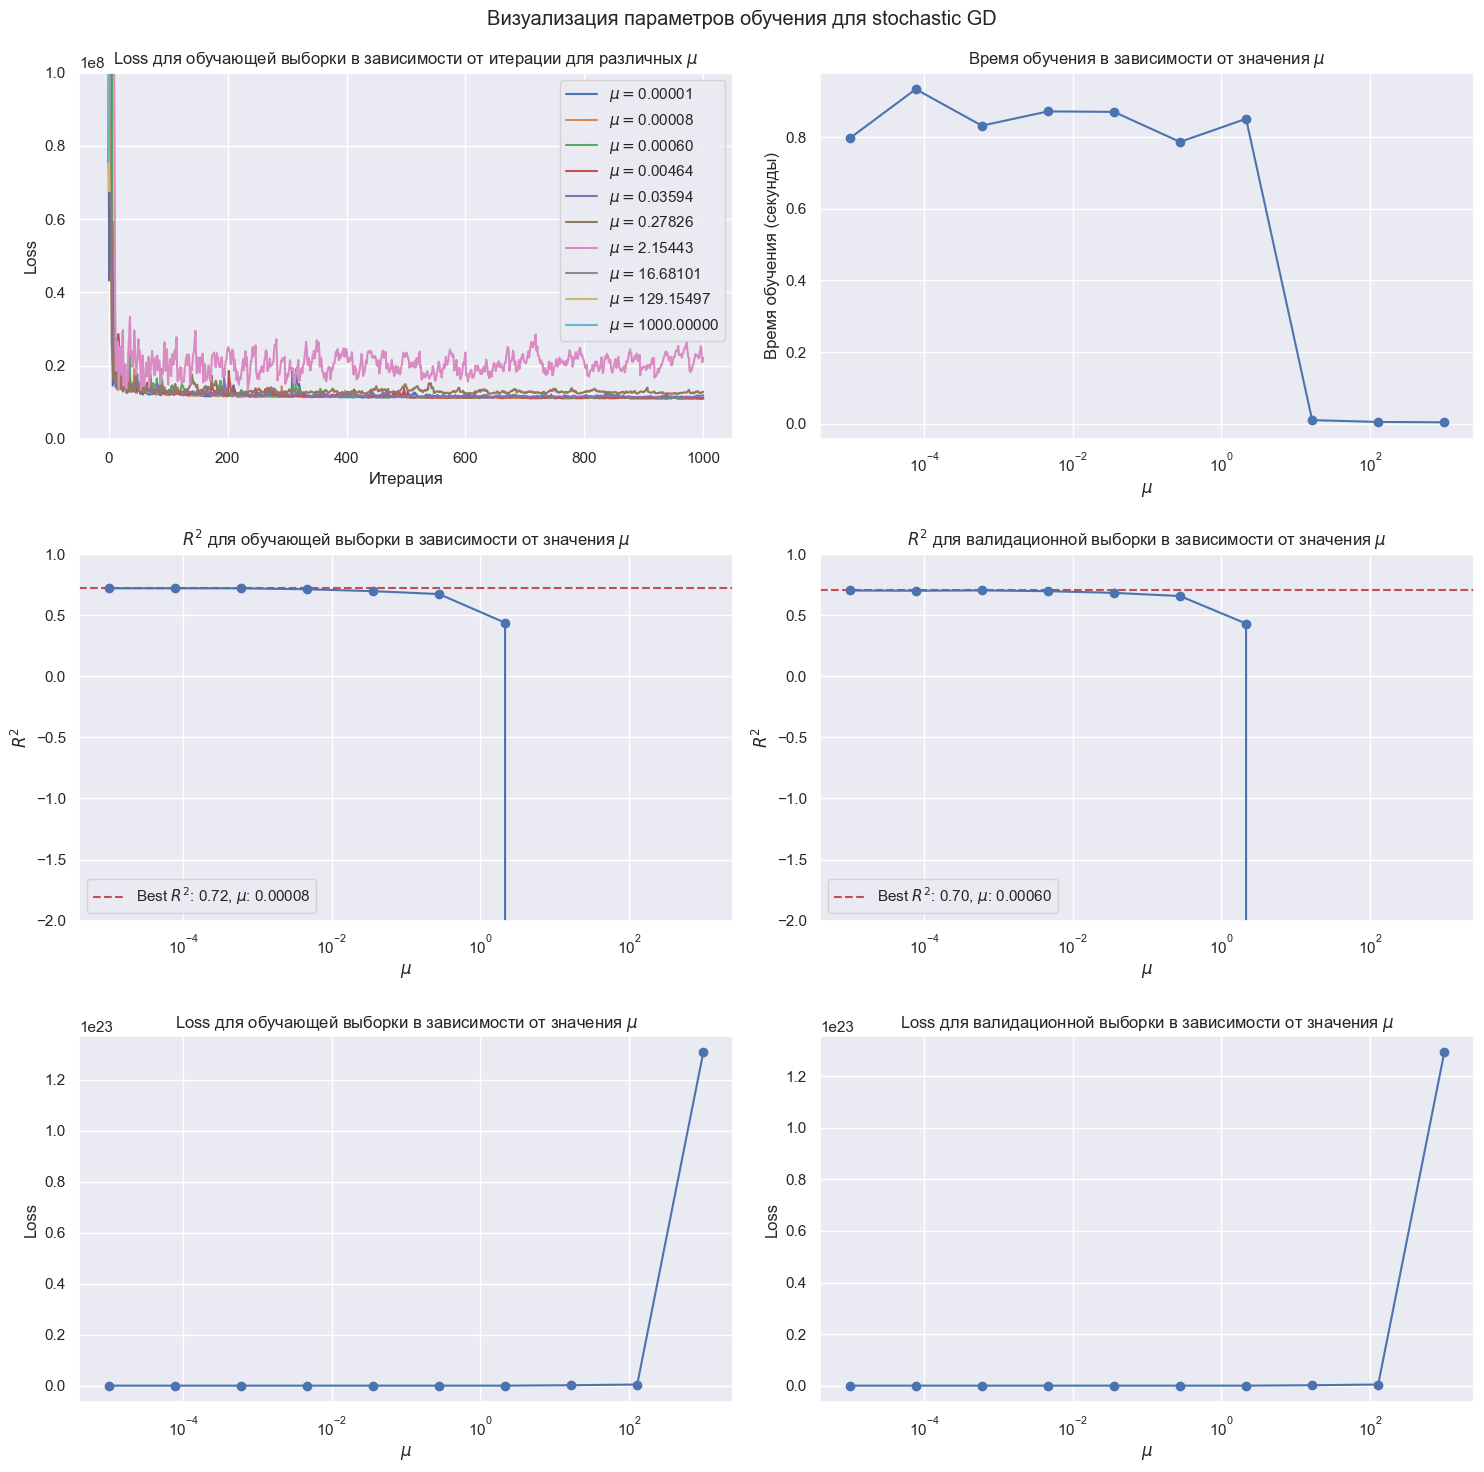

In [43]:
descent_config = {
    'descent_name': 'stochastic',
    'regularized': True,      
    'kwargs': {
        'dimension': X_train.shape[1],
        'batch_size': 10,
    }
}
analyze_and_plot_descent_reg(descent_config, X_train, y_train, X_val, y_val,)

 60%|███████████████████████████                  | 3/5 [04:08<02:39, 79.82s/it]

Gradient explosion detected. Stopping iterations.


 80%|████████████████████████████████████         | 4/5 [05:07<01:11, 71.45s/it]

Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.


100%|█████████████████████████████████████████████| 5/5 [05:07<00:00, 61.57s/it]

Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.
Gradient explosion detected. Stopping iterations.


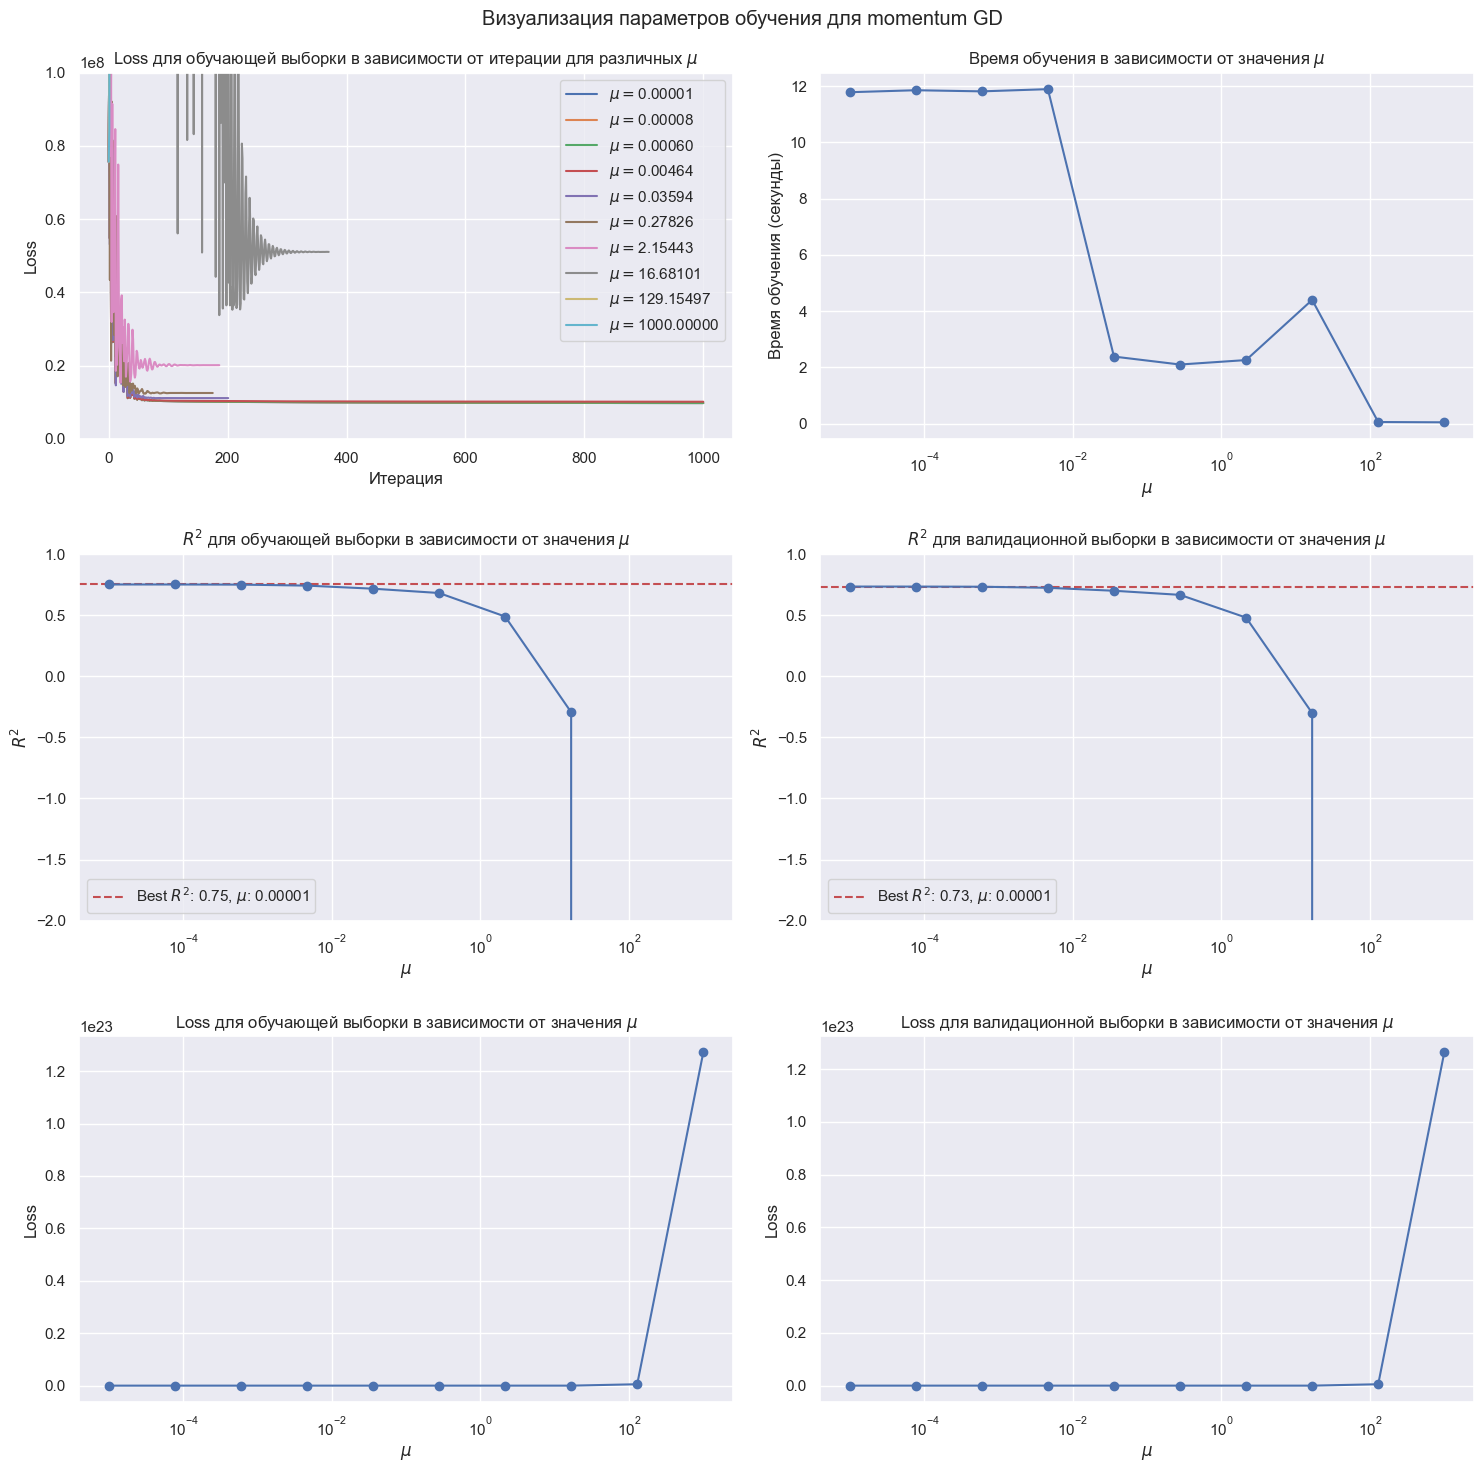

In [44]:
descent_config = {
    'descent_name': 'momentum',
    'regularized': True,    
    'kwargs': {
        'dimension': X_train.shape[1]
    }
}
analyze_and_plot_descent_reg(descent_config, X_train, y_train, X_val, y_val,)

100%|█████████████████████████████████████████████| 5/5 [02:58<00:00, 35.79s/it]


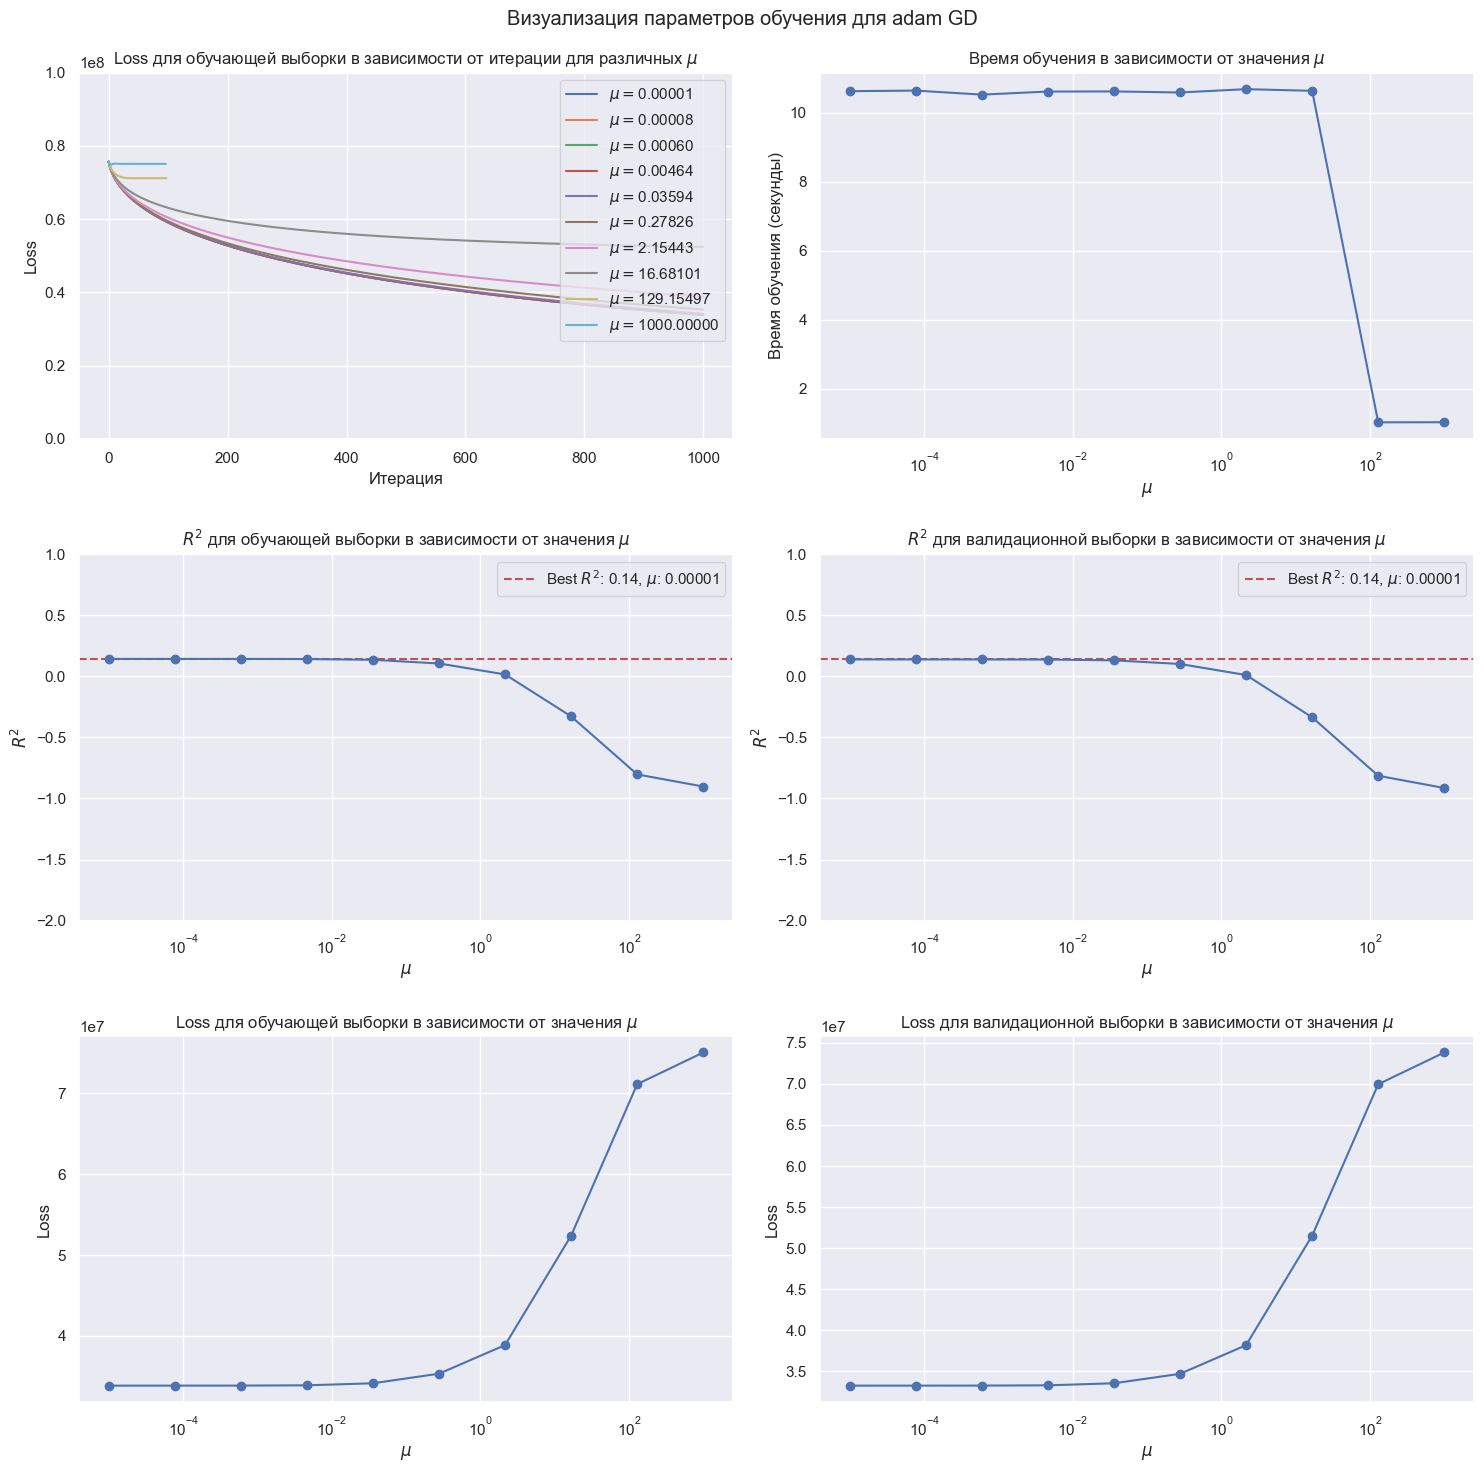

In [45]:
descent_config = {
    'descent_name': 'adam',
    'regularized': True,      
    'kwargs': {
        'dimension': X_train.shape[1],
    }
}
analyze_and_plot_descent_reg(descent_config, X_train, y_train, X_val, y_val,)

**Выводы**: самый главный результат - это сходимость! Ранее мы устанавливали максимальное число итераций, равное 1000, и алгоритм не сходился при таком числе итераций. А сейчас мы видим, что некоторые GD сошлись, при этом Momentum GD обеспечил качество на валидации $R^2=0.73$. При этом все так же адам не очень себя показал со своими зафиксированными гиперпараметрами. В целом, соотношения между методами градиентного спуска остались такими же.

Перейдем к самому $mu$, его ж мы варьировали в данном случае. Это коэффициент, отвечающий за штраф за слишком большие веса. На графиках видно, что имеет место параболическая зависимость ошибок и качества. То есть, при нулевом $\mu$, что соответствует отсутствию регуляризации, модель может переобучиваться на большие веса. В то же время при большом $\mu$ модель будет иметь большое смещение из-за того, что много весов начнет оказываться около нуля, то есть будет недообучение. Таким образом, есть некая золотая середина, трейд-офф между переобучение и недообучением, который контролируется параметров $\mu$. На графиках отражены лучшие $\mu$, для каждого метода градиентного спуска.

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$




Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

**Решение**: $$L' = \frac{cosh'(a-y)}{cosh(a-y)} = \frac{sh(a-y)}{cosh(a-y)}a' = tanh(a-y)a'$$

Конечная формула для градиента функции потерь Log-Cosh по отношению к матрице весов в матричном виде выглядит следующим образом:
$$
\frac{\partial L}{\partial \mathbf{W}} = \frac{1}{m} \cdot \mathbf{X}^T \cdot \tanh(\mathbf{XW} - \mathbf{Y})
$$


Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [46]:
from sklearn.metrics import r2_score
from tqdm import tqdm
import time 

def analyze_and_plot_descent(descent_config, X_train, y_train, X_val, y_val,
                             lambda_range=np.logspace(-1, 6, num=15),
                             max_iter=1000,
                             tolerance=10**-2,
                             loss_threshold = 10**20):
    # Списки для хранения результатов
    n_iters = []
    loss_history = []
    training_times = []
    train_errors = []
    val_errors = []
    train_r2_scores = []
    val_r2_scores = []  
    for lambda_value in tqdm(lambda_range):
        descent_config['kwargs']['lambda_'] = lambda_value
        model = LinearRegression(
            descent_config=descent_config,
            tolerance=tolerance,
            max_iter=max_iter,
            loss_threshold=loss_threshold
        )

        start_time = time.time()

        # Обучение модели на обучающем наборе данных
        model.fit(X_train, y_train)

        training_times.append(time.time() - start_time)
        n_iters.append(len(model.loss_history))
        loss_history.append(model.loss_history)
        # Получение предсказаний на обучающем и валидационном наборах
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        # Вычисление ошибки на обучающем и валидационном наборах
        train_error = model.calc_loss(X_train, y_train)
        val_error = model.calc_loss(X_val, y_val)

        # Вычисление R^2 на обучающем и валидационном наборах
        train_r2 = r2_score(y_train, y_train_pred)
        val_r2 = r2_score(y_val, y_val_pred)

        # Добавление результатов в соответствующие списки
        train_errors.append(train_error)
        val_errors.append(val_error)
        train_r2_scores.append(train_r2)
        val_r2_scores.append(val_r2)

    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    gd_name = descent_config['descent_name']
    fig.suptitle(f'Визуализация параметров обучения для {gd_name} GD')
    # Отображение лоссов на обучающей выборки в зависимости от итерации для каждой лямбды
    for i, lambda_val in enumerate(lambda_range):
        ax[0,0].plot(loss_history[i], label=f'$\lambda=${lambda_val:.5f}')
    ax[0,0].set_ylim(0, 1e6)    
    ax[0,0].set_xlabel('Итерация')
    ax[0,0].set_ylabel('Loss')
    ax[0,0].set_title('Loss для обучающей выборки в зависимости от итерации для различных $\lambda$')
    ax[0,0].legend()
    ax[0,0].grid(True)

    # Отображение времени обучения в зависимости от значения лямбда
    ax[0,1].plot(lambda_range, training_times, marker='o')
    ax[0,1].set_xlabel('$\lambda$')
    ax[0,1].set_ylabel('Время обучения (секунды)')
    ax[0,1].set_title('Время обучения в зависимости от значения $\lambda$')
    ax[0,1].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[0,1].grid(True)

    # Отображение R^2 в зависимости от итерации для каждой лямбды
    max_train_r2_score = train_r2_scores[np.argmax(train_r2_scores)]
    best_lambda = lambda_range[np.argmax(train_r2_scores)]
    ax[1,0].axhline(y=max_train_r2_score, color='r', linestyle='--', label=f'Best $R^2$: {max_train_r2_score:.2f}, $\lambda$: {best_lambda:.5f}')    
    ax[1,0].plot(lambda_range, train_r2_scores, marker='o')
    ax[1,0].legend()
    ax[1,0].set_ylim(-2, 1)    
    ax[1,0].set_xlabel('$\lambda$')
    ax[1,0].set_ylabel('$R^2$')
    ax[1,0].set_title('$R^2$ для обучающей выборки в зависимости от значения $\lambda$')
    ax[1,0].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[1,0].grid(True)

    # Отображение R^2 в зависимости от итерации для каждой лямбды
    max_val_r2_score = val_r2_scores[np.argmax(val_r2_scores)]
    best_lambda = lambda_range[np.argmax(val_r2_scores)]
    ax[1,1].axhline(y=max_val_r2_score, color='r', linestyle='--', label=f'Best $R^2$: {max_val_r2_score:.2f}, $\lambda$: {best_lambda:.5f}')
    ax[1,1].plot(lambda_range, val_r2_scores, marker='o')
    ax[1,1].legend()
    ax[1,1].set_ylim(-2, 1)    
    ax[1,1].set_xlabel('$\lambda$')
    ax[1,1].set_ylabel('$R^2$')
    ax[1,1].set_title('$R^2$ для валидационной выборки в зависимости от значения $\lambda$')
    ax[1,1].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[1,1].grid(True)

    # Отображение loss train в зависимости от значения лямбда
    ax[2,0].plot(lambda_range, train_errors, marker='o')
    ax[2,0].set_xlabel('$\lambda$')
    ax[2,0].set_ylabel('Loss')
    ax[2,0].set_title('Loss для обучающей выборки в зависимости от значения $\lambda$')
    ax[2,0].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[2,0].grid(True)

    # Отображение val train в зависимости от значения лямбда
    ax[2,1].plot(lambda_range, val_errors, marker='o')  
    ax[2,1].set_xlabel('$\lambda$')
    ax[2,1].set_ylabel('Loss')
    ax[2,1].set_title('Loss для валидационной выборки в зависимости от значения $\lambda$')
    ax[2,1].set_xscale('log') # Устанавливаем логарифмическую шкалу для оси x
    ax[2,1].grid(True)

    # Устанавливаем промежутки между графиками
    plt.tight_layout()
    plt.show()    

100%|███████████████████████████████████████████| 15/15 [00:18<00:00,  1.22s/it]


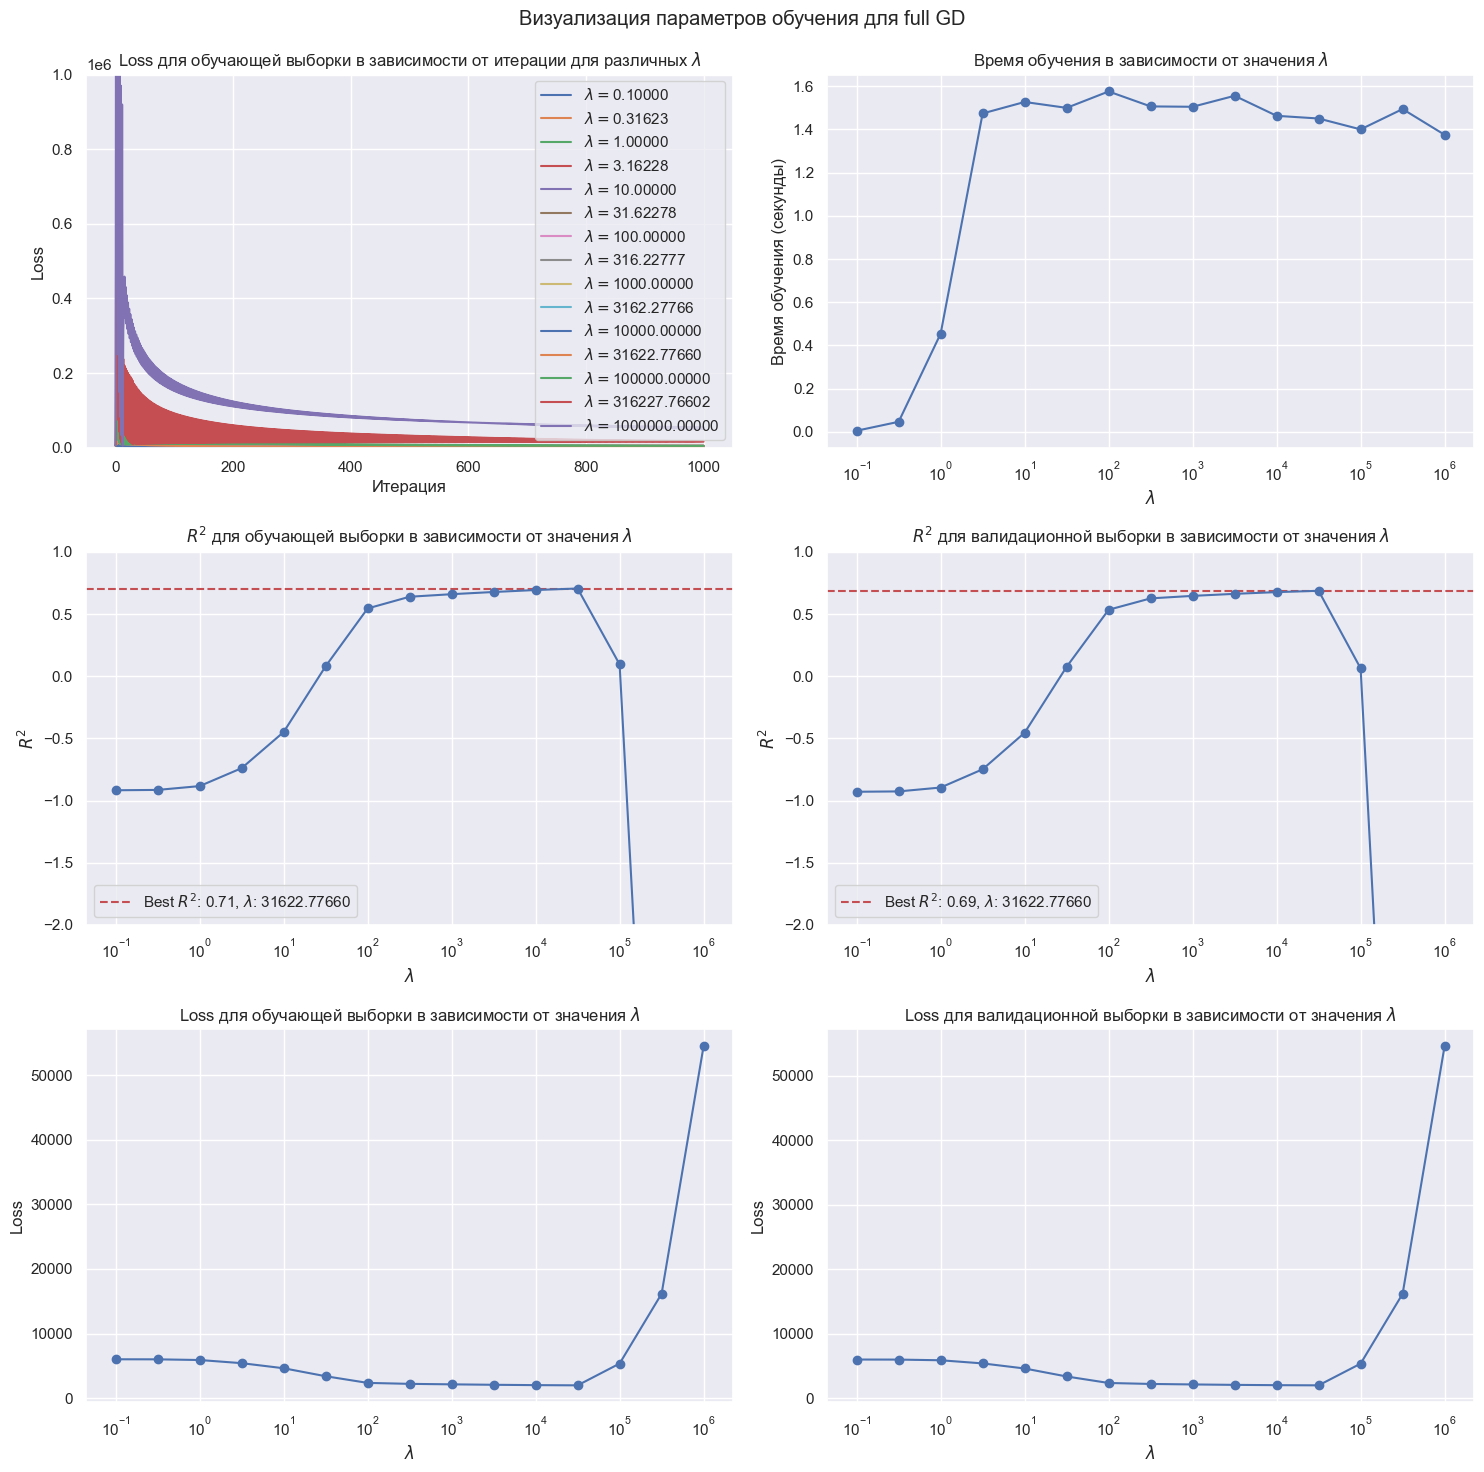

In [47]:
from descents import LossFunction

descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': X_train.shape[1],
        'loss_function': LossFunction.LogCosh
    }
}
analyze_and_plot_descent(descent_config, X_train, y_train, X_val, y_val,)

100%|███████████████████████████████████████████| 15/15 [00:09<00:00,  1.55it/s]


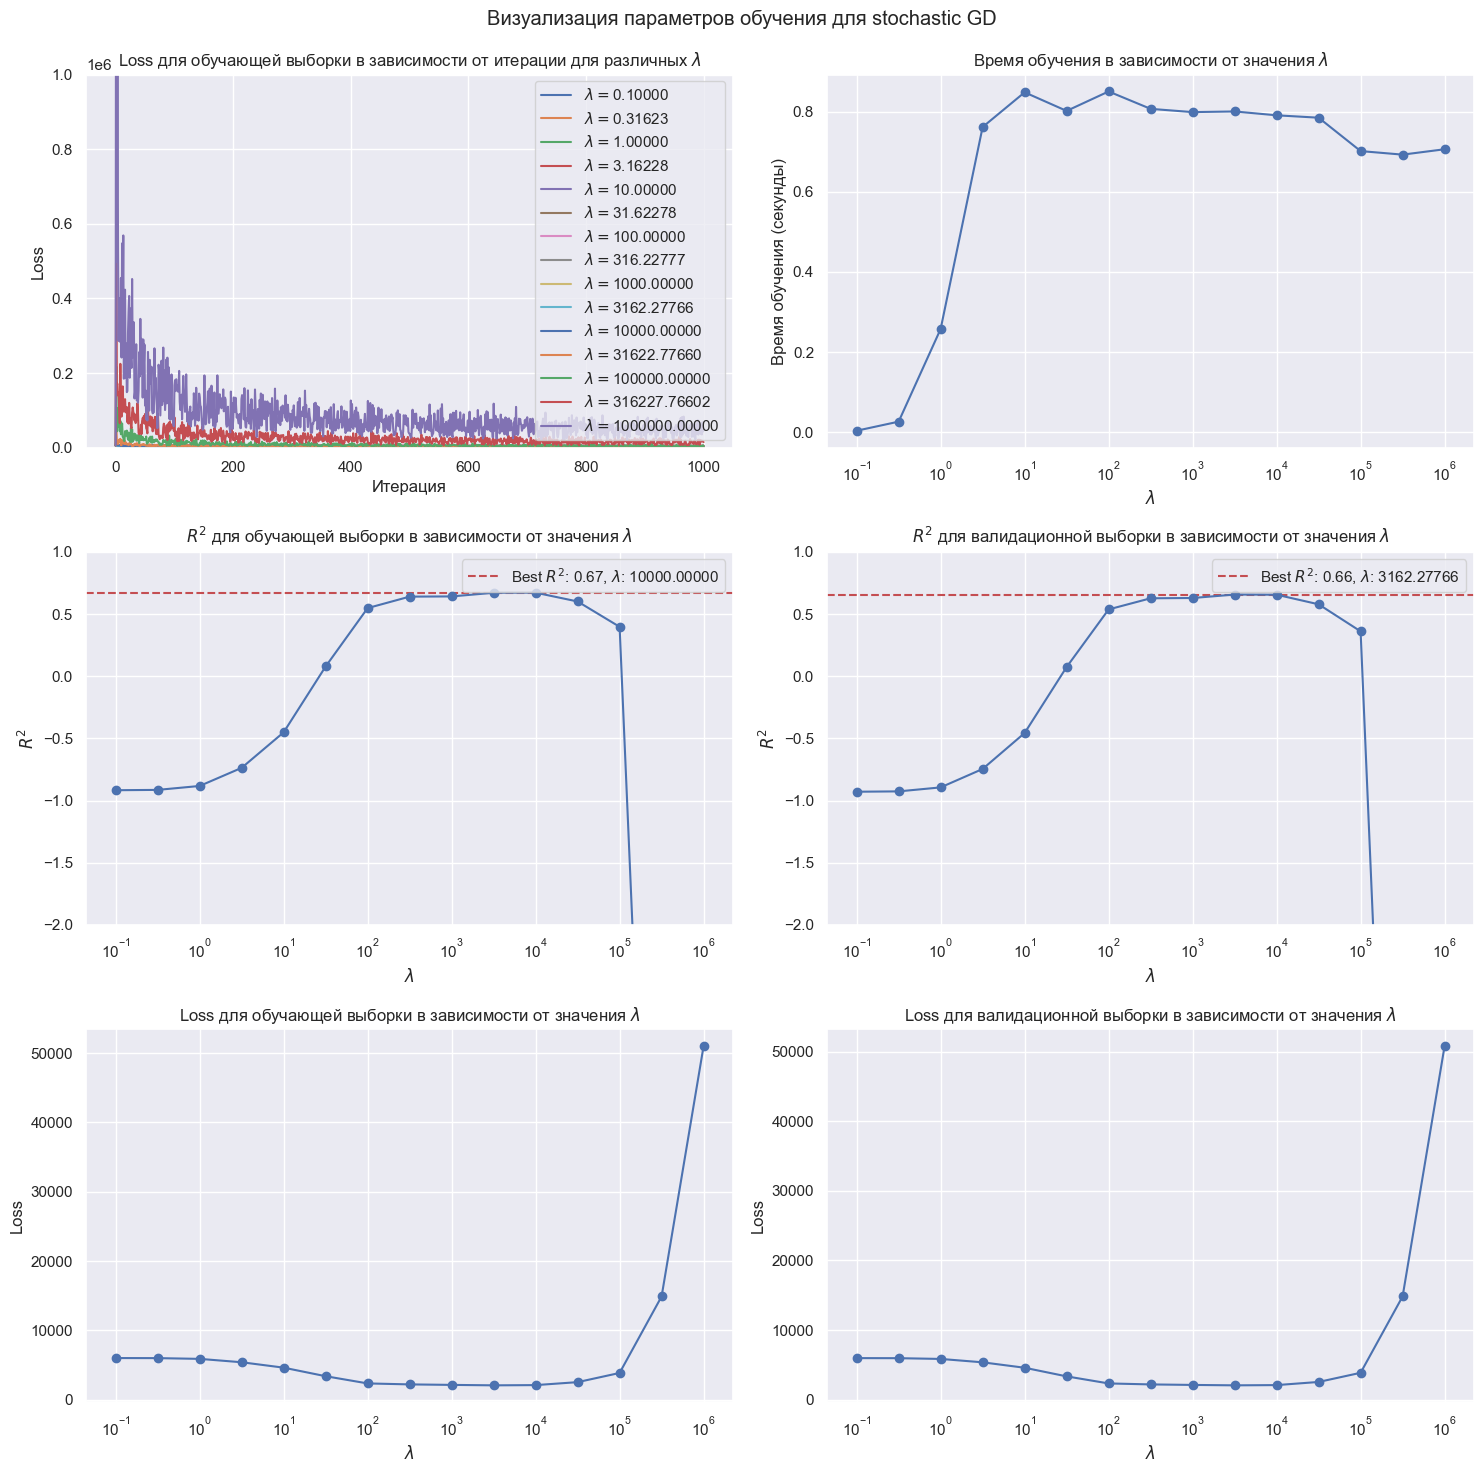

In [48]:
descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': X_train.shape[1],
        'batch_size': 10,
        'loss_function': LossFunction.LogCosh
    }
}
analyze_and_plot_descent(descent_config, X_train, y_train, X_val, y_val,)

100%|███████████████████████████████████████████| 15/15 [00:21<00:00,  1.44s/it]


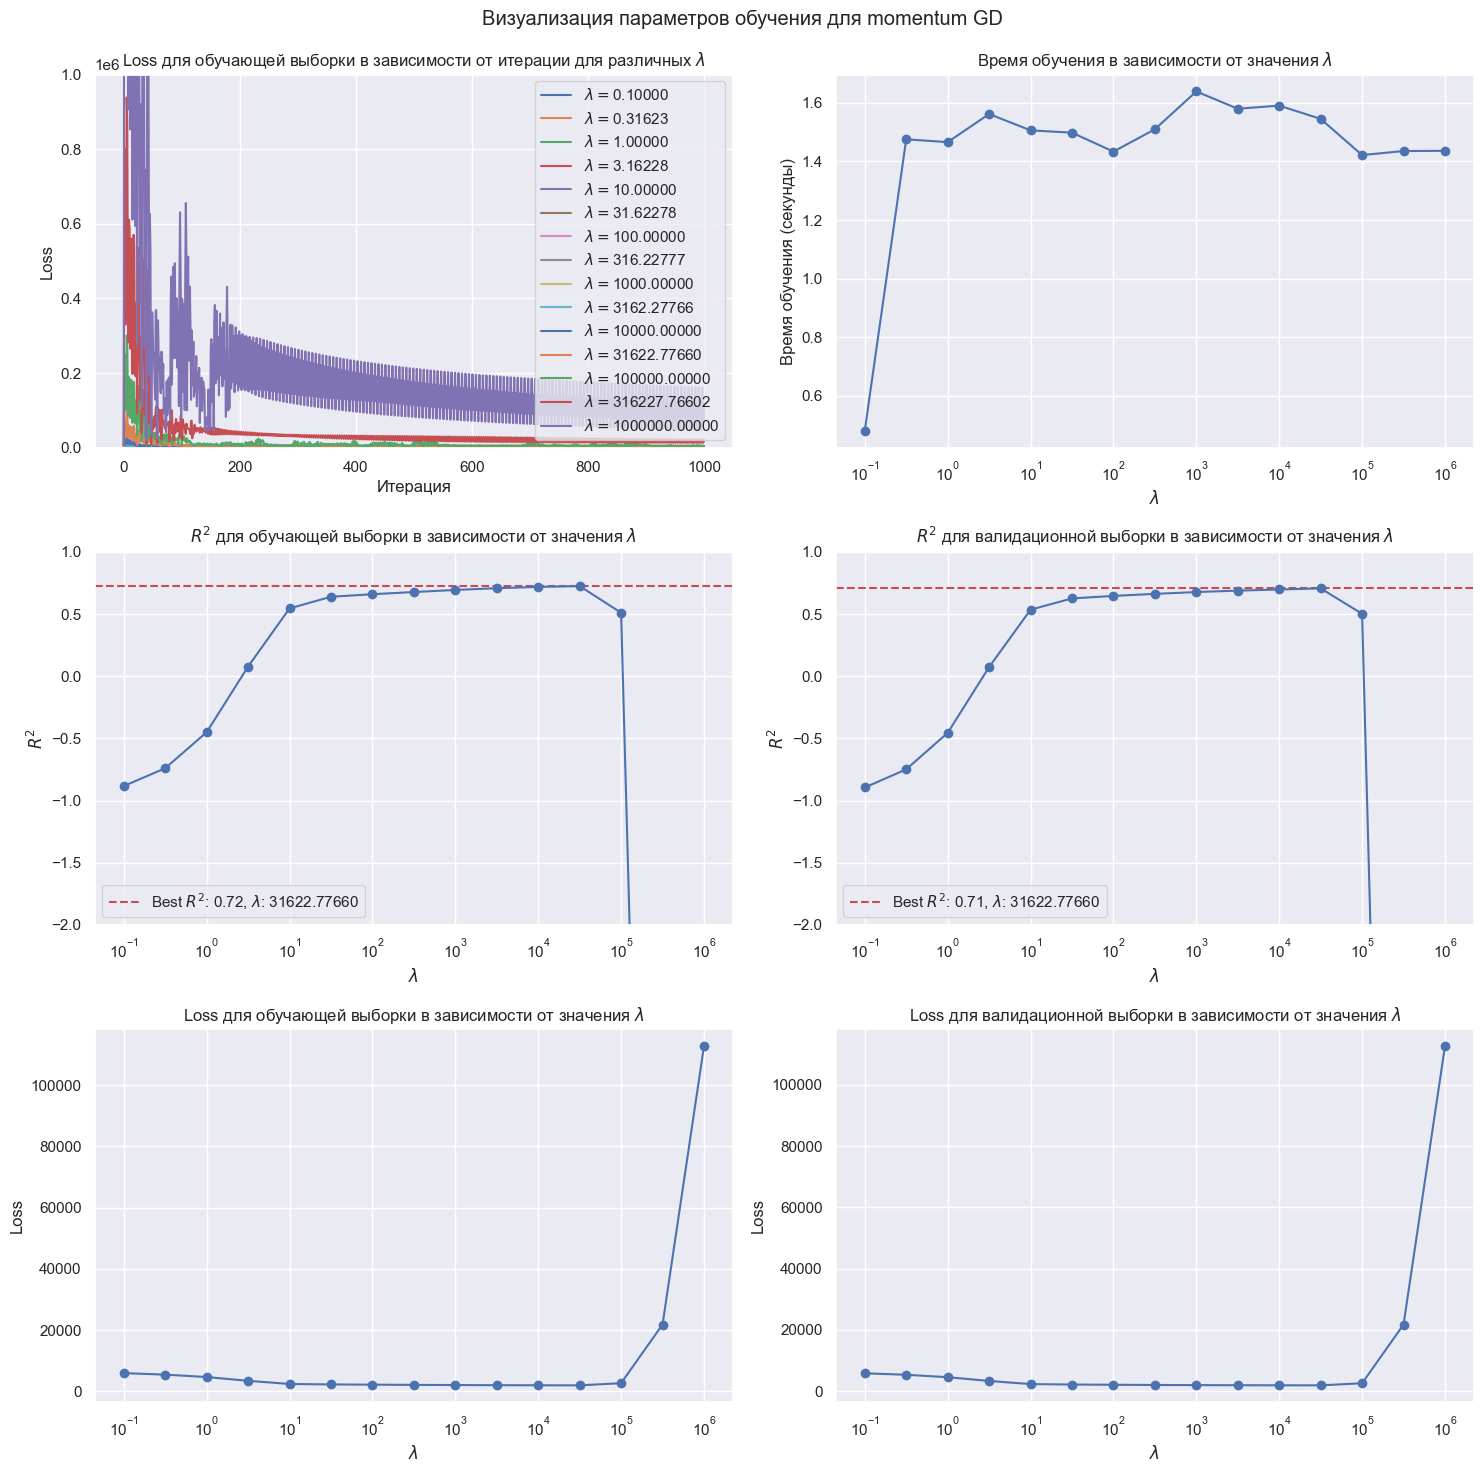

In [49]:
descent_config = {
    'descent_name': 'momentum',
    'kwargs': {
        'dimension': X_train.shape[1],
        'loss_function': LossFunction.LogCosh
    }
}
analyze_and_plot_descent(descent_config, X_train, y_train, X_val, y_val,)

100%|███████████████████████████████████████████| 15/15 [00:21<00:00,  1.44s/it]


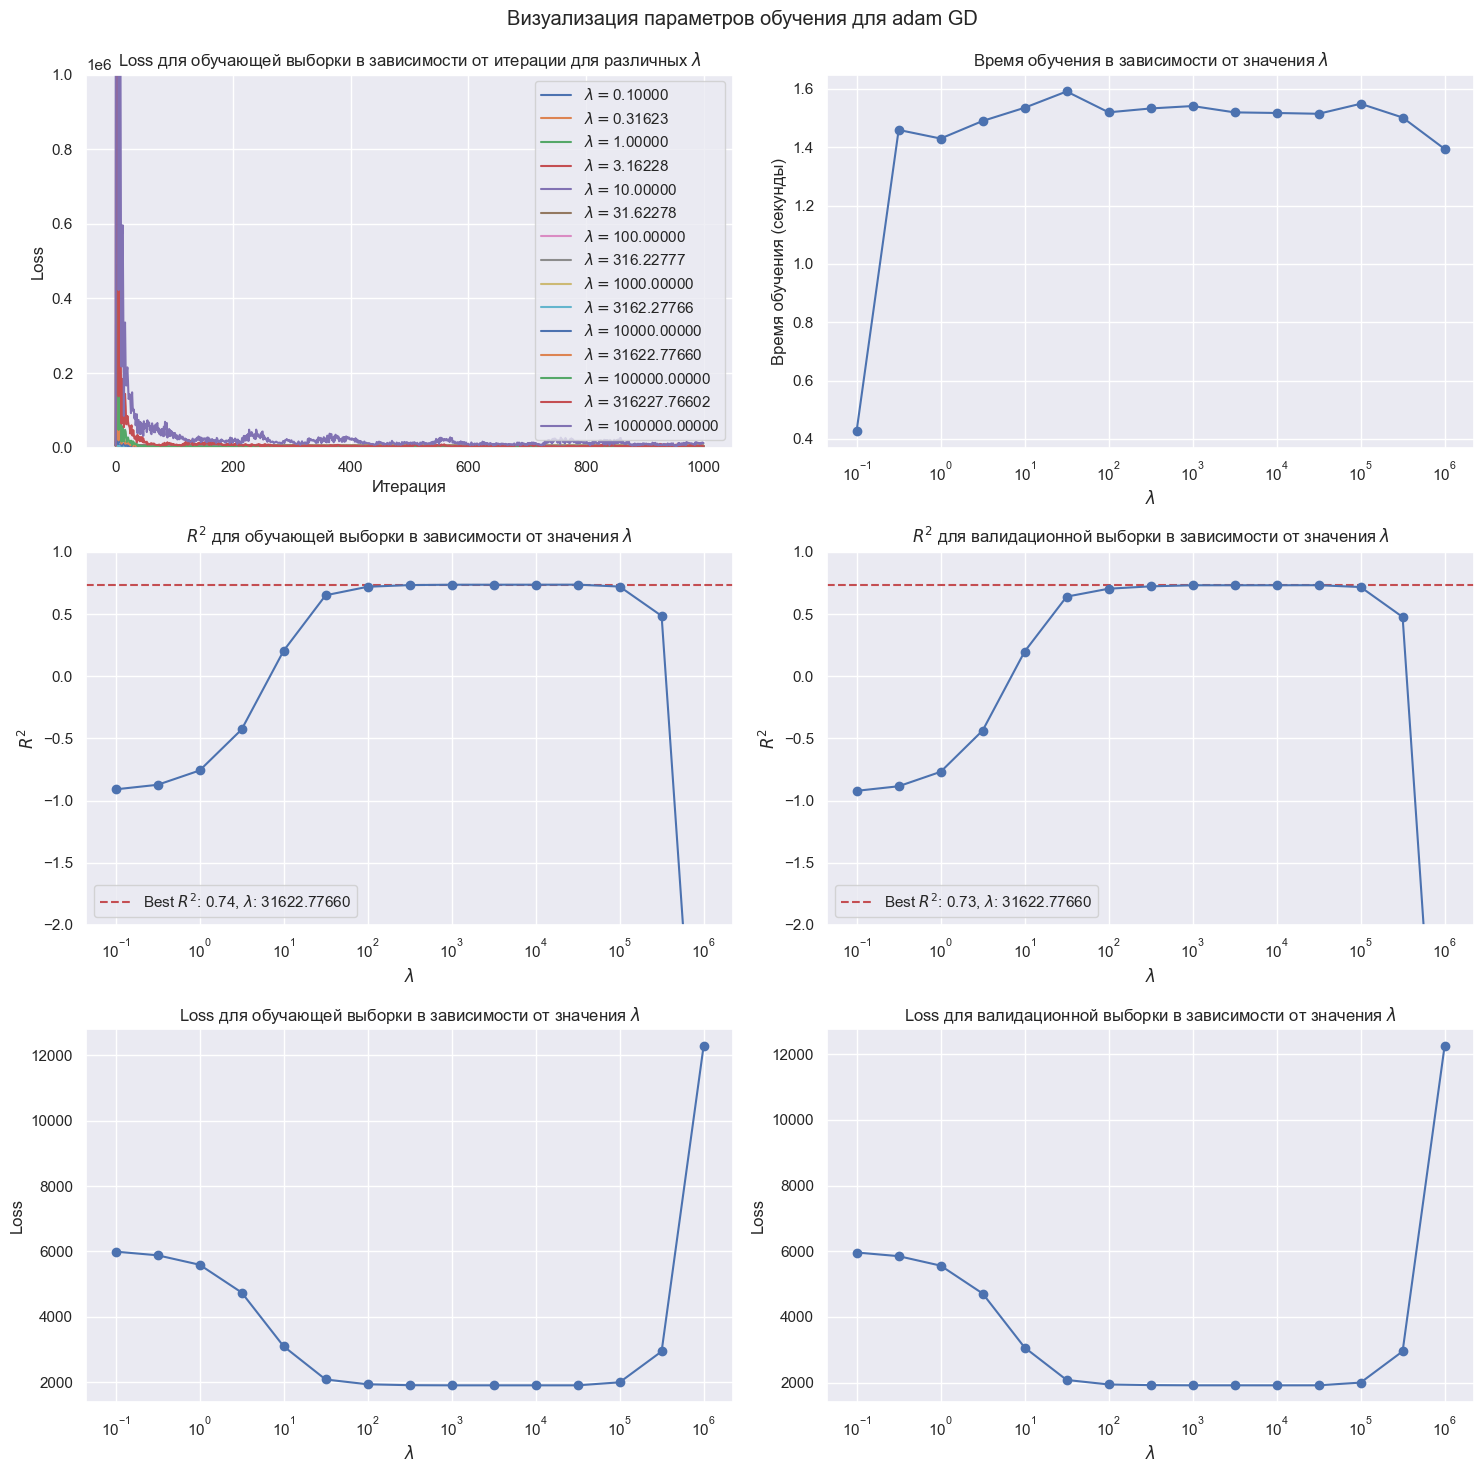

In [50]:
descent_config = {
    'descent_name': 'adam',
    'kwargs': {
        'dimension': X_train.shape[1],
        'loss_function': LossFunction.LogCosh
    }
}
analyze_and_plot_descent(descent_config, X_train, y_train, X_val, y_val,)

**Вывод**: Итак, в целом все те отличия в методах градиентного спуска, которые мы увидели в 5 задании, так же наблюдаются и на примере этого задания, с другой функцией ошибки. Примечательно, что адам-градиентный спуск в этом сэтапе реабилитирует себя и показывает лучшее качество, по сравнению с другими видами градиентного спуска. Кроме того, и по качеству опережает остальные методы.

Если сравнить результаты по сравнению с 5 заданием, где была MSE в качестве ошибки, то сейчас стало чуть хуже с точки зрения $R^2$, сейчас максимум при применении adam-градиентного спуска, на валидации 0.73. Во время тестирования на MSE функцией лучше всего показал Momentum градиентный спуск с качеством на валидации в 0.75. Таким образом, сам выбор функционала ошибки тоже является важным гиперпараметром.